## Comparing step-by-step simulation with EpanetCPA results

The comparison is carried out considering different scenarios and initialization values. The plots show pressure of tanks, pressure of some randomly sampled junctions (seed =23) and current status of pumps. <br>Each scenarios exploits demand driven analysis since pressure driven won't affect the correctness of the comparison.

In [1]:
from scripts import network, utils
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

- FIRST SCENARIO: every initialization value of no_attack.cpa is commented (24h) <br>
Problems: tanks {T1, T2, T5}, pumps {PU2, PU8}

In [2]:
net = network.WaterDistributionNetwork("ctown.inp")
net.set_time_params(duration=86400, hydraulic_step=300) # duration=24h, hydstep=10min

In [3]:
net.run(interactive=False)

In [4]:
df = net.df_nodes_report
df

node                 tanks                                            \
id                      T1                              T2             
properties            head  pressure     demand       head  pressure   
0 days 00:00:00  74.484864  2.984864 -38.821411  65.519114  0.519114   
0 days 00:05:00  74.469807  2.969807 -38.619225  65.538102  0.538102   
0 days 00:10:00  74.454828  2.954828 -38.417689  65.556965  0.556965   
0 days 00:15:00  74.439928  2.939928 -38.216930  65.575702  0.575702   
0 days 00:20:00  74.425105  2.925105 -38.016933  65.594315  0.594315   
...                    ...       ...        ...        ...       ...   
0 days 23:40:33  73.288117  1.788117 -85.005596  67.029957  2.029957   
0 days 23:45:00  73.255036  1.755036 -84.849275  67.018803  2.018803   
0 days 23:50:00  73.222022  1.722022 -84.674196  67.007577  2.007577   
0 days 23:55:00  73.189077  1.689077 -84.499819  66.996281  1.996281   
1 days 00:00:00  73.189077  1.689077 -75.680020  66.996281  1.996281   

node                                                                     ...  \
id                                  T3                               T4  ...   
properties          demand        head  pressure     demand        head  ...   
0 days 00:00:00  21.608316  115.942810  3.042810  21.128039  135.021411  ...   
0 days 00:05:00  21.465635  115.985599  3.085599  21.117646  135.042814  ...   
0 days 00:10:00  21.323471  116.028367  3.128367  21.107230  135.064210  ...   
0 days 00:15:00  21.181989  116.071114  3.171114  21.096789  135.085598  ...   
0 days 00:20:00  21.041202  116.113840  3.213840  21.086324  135.106979  ...   
...                    ...         ...       ...        ...         ...  ...   
0 days 23:40:33 -12.536892  116.421870  3.521870  18.220894  135.211724  ...   
0 days 23:45:00 -12.609252  116.458757  3.558757  18.204683  135.226339  ...   
0 days 23:50:00 -12.689990  116.495607  3.595607  18.186442  135.240925  ...   
0 days 23:55:00 -12.770049  116.532420  3.632420  18.168177  135.255482  ...   
1 days 00:00:00  -8.271386  116.532420  3.632420  20.597235  135.255482  ...   

node            junctions                                                      \
id                   J307       J309                          J317              
properties         demand       head   pressure demand        head   pressure   
0 days 00:00:00       0.0  64.783244  20.783244    0.0  112.697242  68.697242   
0 days 00:05:00       0.0  64.779407  20.779407    0.0  112.725721  68.725721   
0 days 00:10:00       0.0  64.775588  20.775588    0.0  112.754156  68.754156   
0 days 00:15:00       0.0  64.771801  20.771801    0.0  112.782551  68.782551   
0 days 00:20:00       0.0  64.768046  20.768046    0.0  112.810907  68.810907   
...                   ...        ...        ...    ...         ...        ...   
0 days 23:40:33       0.0  62.418313  18.418313    0.0  113.674009  69.674009   
0 days 23:45:00       0.0  62.402080  18.402080    0.0  113.687575  69.687575   
0 days 23:50:00       0.0  62.383850  18.383850    0.0  113.702767  69.702767   
0 days 23:55:00       0.0  62.365632  18.365632    0.0  113.717902  69.717902   
1 days 00:00:00       0.0  63.014718  19.014718    0.0  116.454550  72.454550   

node                                                  
id                            J323                    
properties      demand        head   pressure demand  
0 days 00:00:00    0.0  112.697242  68.697242    0.0  
0 days 00:05:00    0.0  112.725721  68.725721    0.0  
0 days 00:10:00    0.0  112.754156  68.754156    0.0  
0 days 00:15:00    0.0  112.782551  68.782551    0.0  
0 days 00:20:00    0.0  112.810907  68.810907    0.0  
...                ...         ...        ...    ...  
0 days 23:40:33    0.0  113.674009  69.674009    0.0  
0 days 23:45:00    0.0  113.687575  69.687575    0.0  
0 days 23:50:00    0.0  113.702767  69.702767    0.0  
0 days 23:55:00    0.0  113.717902  69.717902    0.0  
1 days 00:00:00    0

In [5]:
net.df_links_report

link                  pumps                                                 \
id                      PU1                          PU2                     
properties             flow     energy status       flow     energy status   
0 days 00:00:00   96.589847  43.065501    1.0  96.608843  43.060193    1.0   
0 days 00:05:00   96.599484  43.062809    1.0  96.618483  43.057497    1.0   
0 days 00:10:00   96.609070  43.060130    1.0  96.628072  43.054814    1.0   
0 days 00:15:00   96.618613  43.057461    1.0  96.637617  43.052141    1.0   
0 days 00:20:00   96.628107  43.054804    1.0  96.647115  43.049480    1.0   
...                     ...        ...    ...        ...        ...    ...   
0 days 23:40:33  120.077560  31.490284    1.0   0.000000   0.000000    0.0   
0 days 23:45:00  120.109649  31.467428    1.0   0.000000   0.000000    0.0   
0 days 23:50:00  120.145677  31.441743    1.0   0.000000   0.000000    0.0   
0 days 23:55:00  120.181679  31.416050    1.0   0.000000   0.000000    0.0   
1 days 00:00:00  119.431105  31.946562    1.0   0.000000   0.000000    0.0   

link                                           ... valves                      \
id               PU3                      PU4  ...     v1       V45             
properties      flow energy status       flow  ... status  velocity      flow   
0 days 00:00:00  0.0    0.0    0.0  33.925111  ...    1.0  0.132763  2.421806   
0 days 00:05:00  0.0    0.0    0.0  33.914719  ...    1.0  0.132763  2.421806   
0 days 00:10:00  0.0    0.0    0.0  33.904302  ...    1.0  0.132763  2.421806   
0 days 00:15:00  0.0    0.0    0.0  33.893861  ...    1.0  0.132763  2.421806   
0 days 00:20:00  0.0    0.0    0.0  33.883396  ...    1.0  0.132763  2.421806   
...              ...    ...    ...        ...  ...    ...       ...       ...   
0 days 23:40:33  0.0    0.0    0.0  35.469099  ...    1.0  0.142085  2.591848   
0 days 23:45:00  0.0    0.0    0.0  35.452888  ...    1.0  0.142085  2.591848   
0 days 23:50:00  0.0    0.0    0.0  35.434647  ...    1.0  0.142085  2.591848   
0 days 23:55:00  0.0    0.0    0.0  35.416381  ...    1.0  0.142085  2.591848   
1 days 00:00:00  0.0    0.0    0.0  34.394733  ...    1.0  0.121884  2.223357   

link                                                                            
id                           V47                         V2                     
properties      status  velocity      flow status  velocity        flow status  
0 days 00:00:00    1.0  0.281026  2.278380    1.0  2.063358  104.552449    1.0  
0 days 00:05:00    1.0  0.281026  2.278380    1.0  2.060285  104.396753    1.0  
0 days 00:10:00    1.0  0.281026  2.278380    1.0  2.057222  104.241538    1.0  
0 days 00:15:00    1.0  0.281026  2.278380    1.0  2.054171  104.086951    1.0  
0 days 00:20:00    1.0  0.281026  2.278380    1.0  2.051133  103.932990    1.0  
...                ...       ...       ...    ...       ...         ...    ...  
0 days 23:40:33    1.0  0.300758  2.438351    1.0  1.429980   72.458563    1.0  
0 days 23:45:00    1.0  0.300758  2.438351    1.0  1.428050   72.360771    1.0  
0 days 23:50:00    1.0  0.300758  2.438351    1.0  1.425892   72.251430    1.0  
0 days 23:55:00    1.0  0.300758  2.438351    1.0  1.423747   72.142713    1.0  
1 days 00:00:00    1.0  0.257998  2.091683    1.0  1.483728   75.181999    1.0  

[313 rows x 45 columns]

In [2]:
# Function to compare my simulation with epanetCPA one among 'what_to_compare' parameter
def comparison_plots(df, df_ecpa, what_to_compare):
    columns = df.columns
    ncols = 2
    nrows = np.ceil(len(columns)/ncols).astype(int)
    f, axes = plt.subplots(nrows= nrows, ncols=ncols, figsize = (ncols*10, nrows*5))

    for i,ax in enumerate(f.axes):
        if i == len(columns):
            break
        column = columns[i][0]

        df[column, what_to_compare].plot(ax = ax, label = 'davide', color='k', linewidth = 3)
        try:
            df_ecpa[str(what_to_compare.upper() + '_' + column)].plot(ax = ax, label = 'epanetCPA', color='0.75', linewidth = 5, alpha=0.7)    
        except KeyError:
            ax.plot(df_ecpa.index, np.zeros(len(df_ecpa),), label = 'epanetCPA', color='0.75', linewidth = 5, alpha=0.7)    

        if i == 0:
            ax.legend(fontsize = 12, loc = 2)
        ax.set_title(str(what_to_compare.upper() + '_' + column), fontsize = 14)

    f.tight_layout()
    warnings.filterwarnings('ignore')

In [7]:
df_ecpa = pd.read_csv("../epanetcpa_no_init.csv").set_index("timestamp")

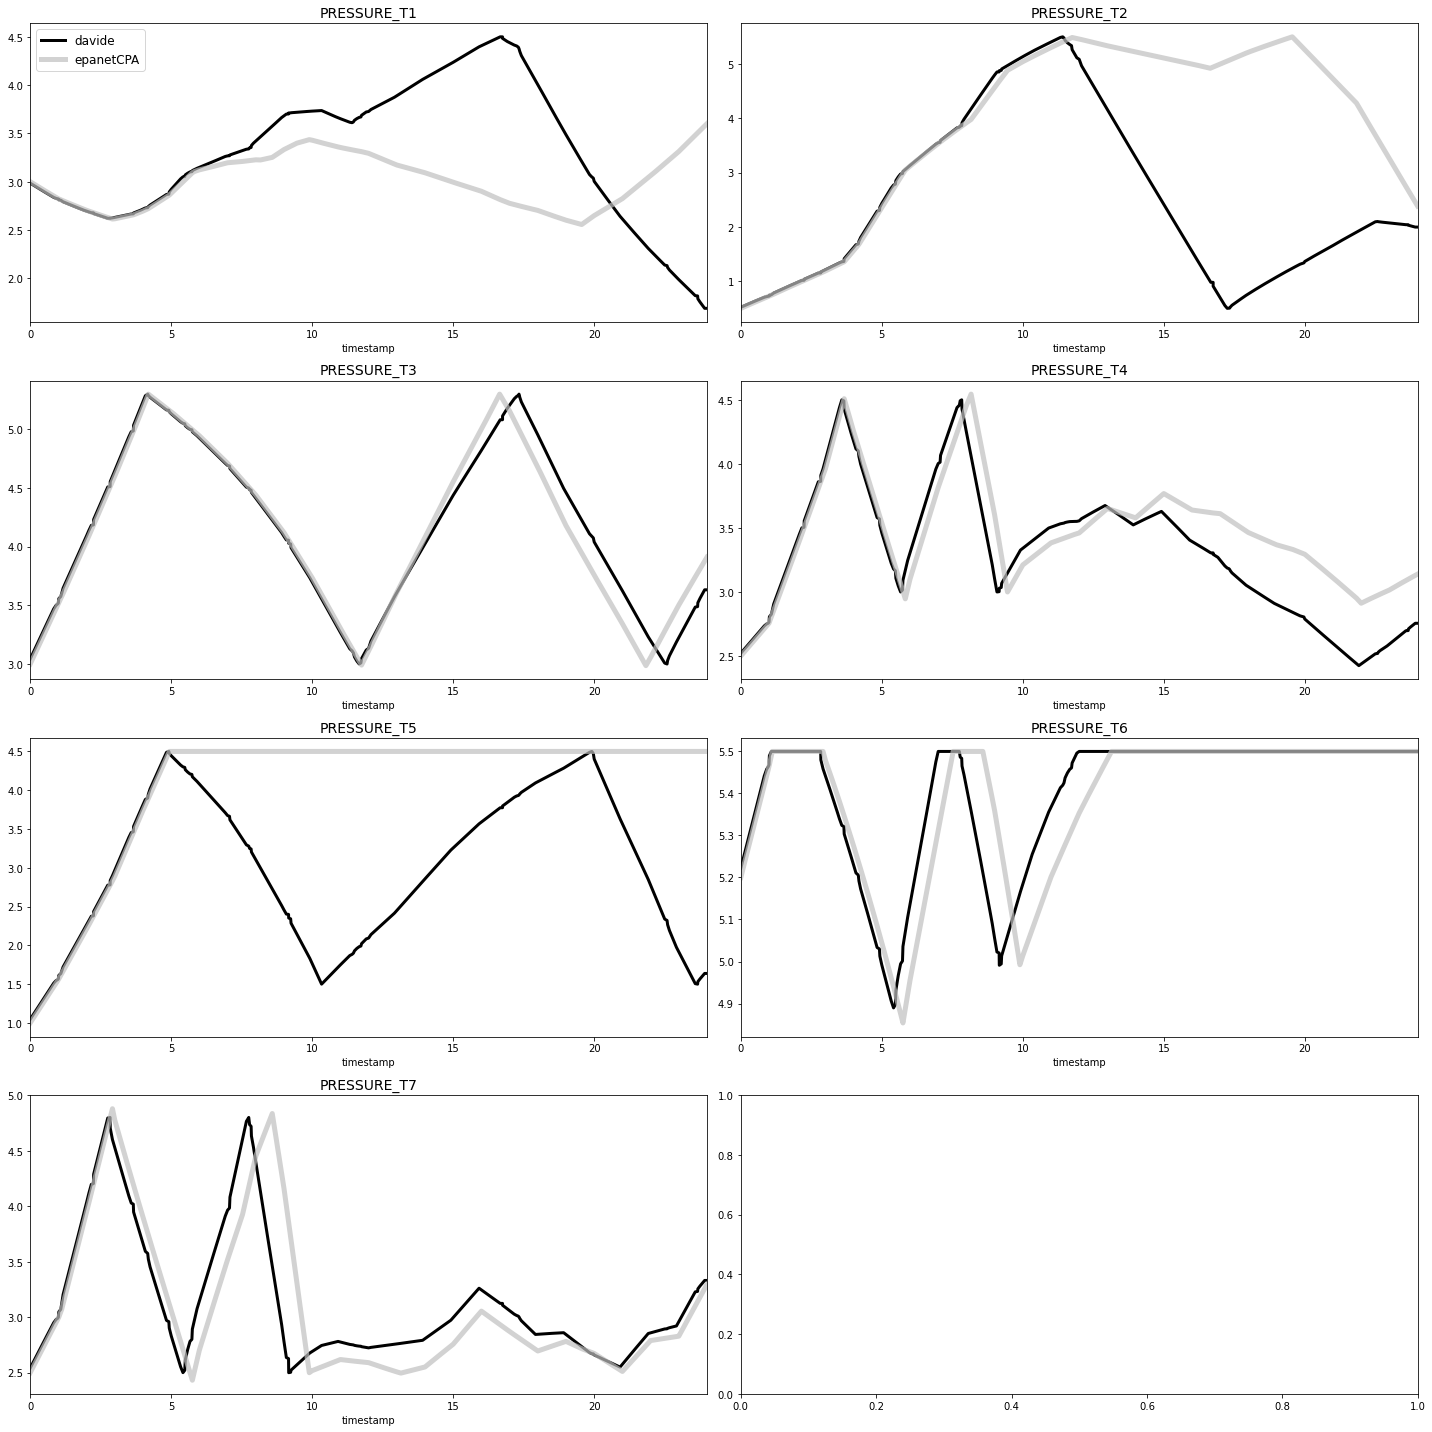

In [8]:
df_tanks = df.iloc[:, df.columns.get_level_values(2)=='pressure']['tanks']
df_tanks.index = np.round(df_tanks.index.total_seconds() / 3600, 4)

comparison_plots(df_tanks, df_ecpa, 'pressure')

In [9]:
df_ecpa['PRESSURE_T5'].max()

4.5

In [10]:
df_tanks['T5'].max()

properties
pressure    4.5
dtype: float64

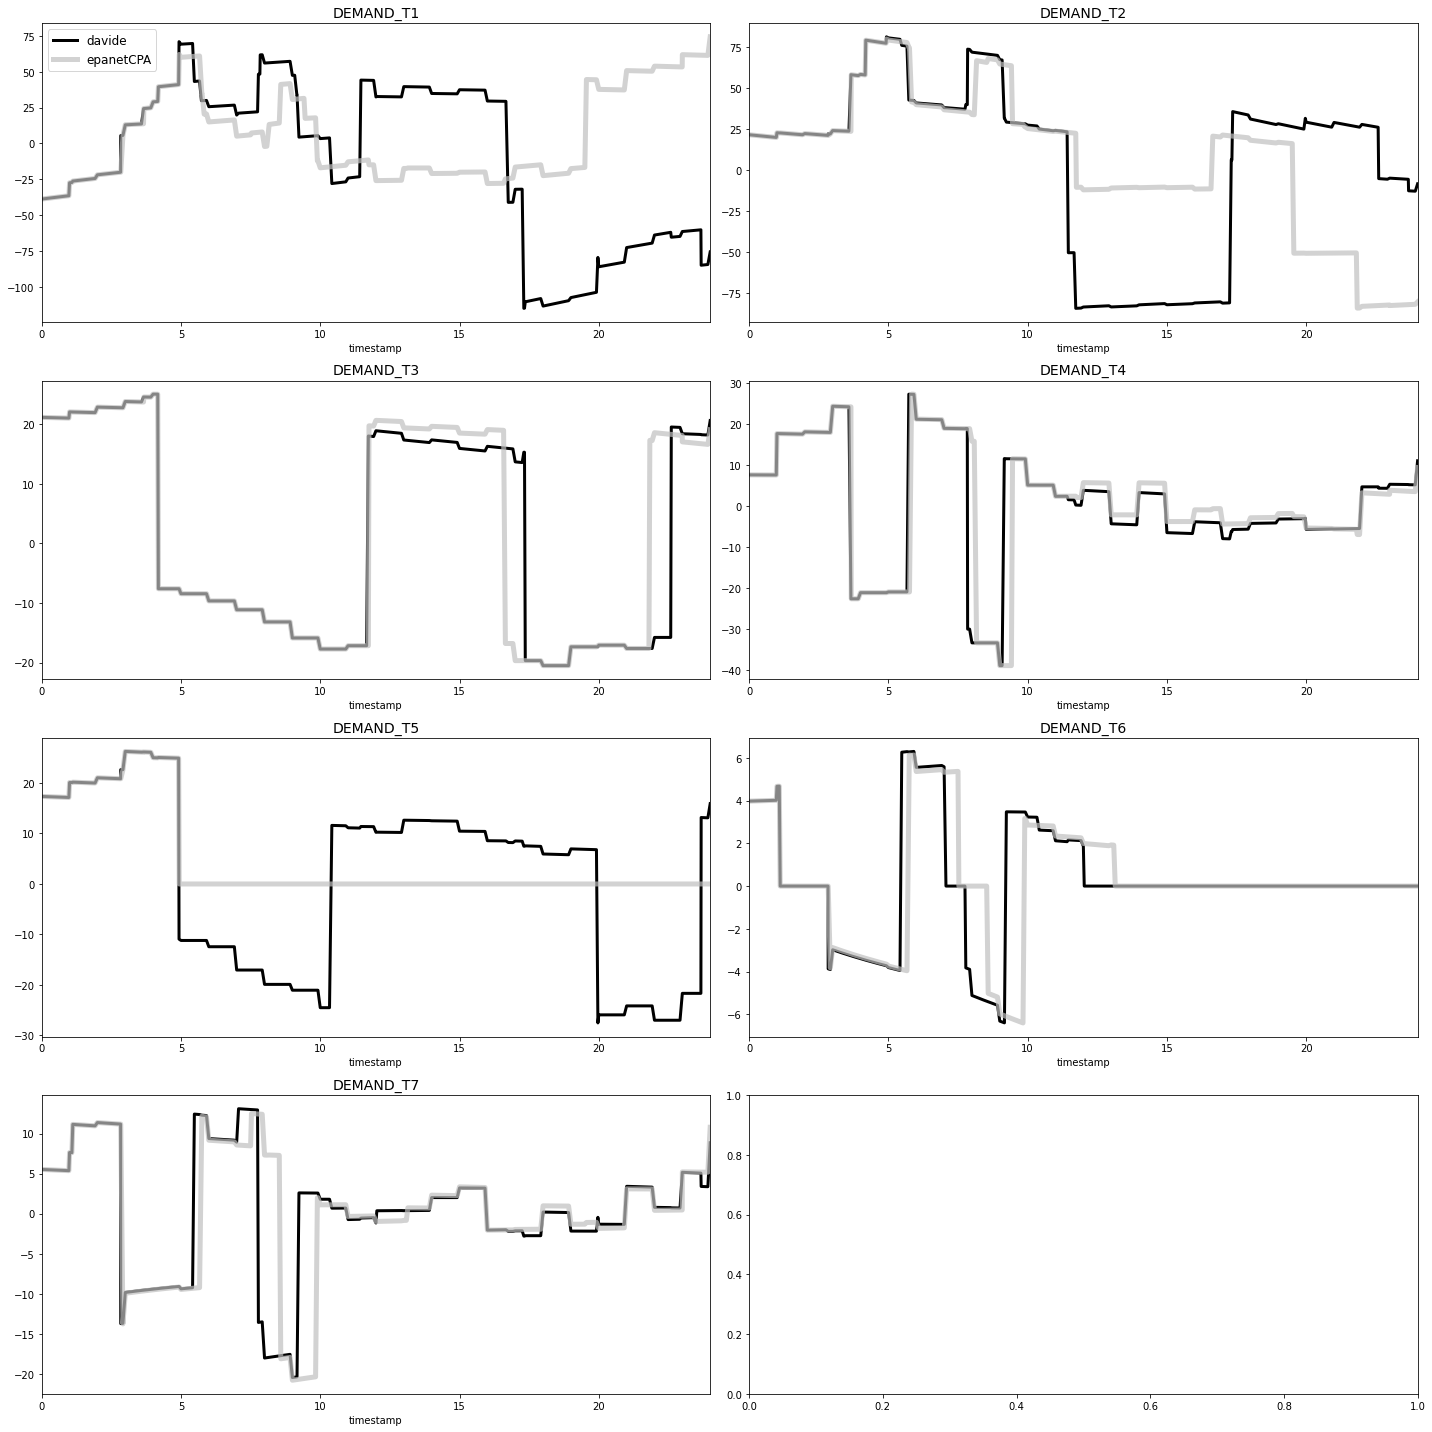

In [11]:
df_tanks = df.iloc[:, df.columns.get_level_values(2)=='demand']['tanks']
df_tanks.index = np.round(df_tanks.index.total_seconds() / 3600, 4)

comparison_plots(df_tanks, df_ecpa, 'demand')

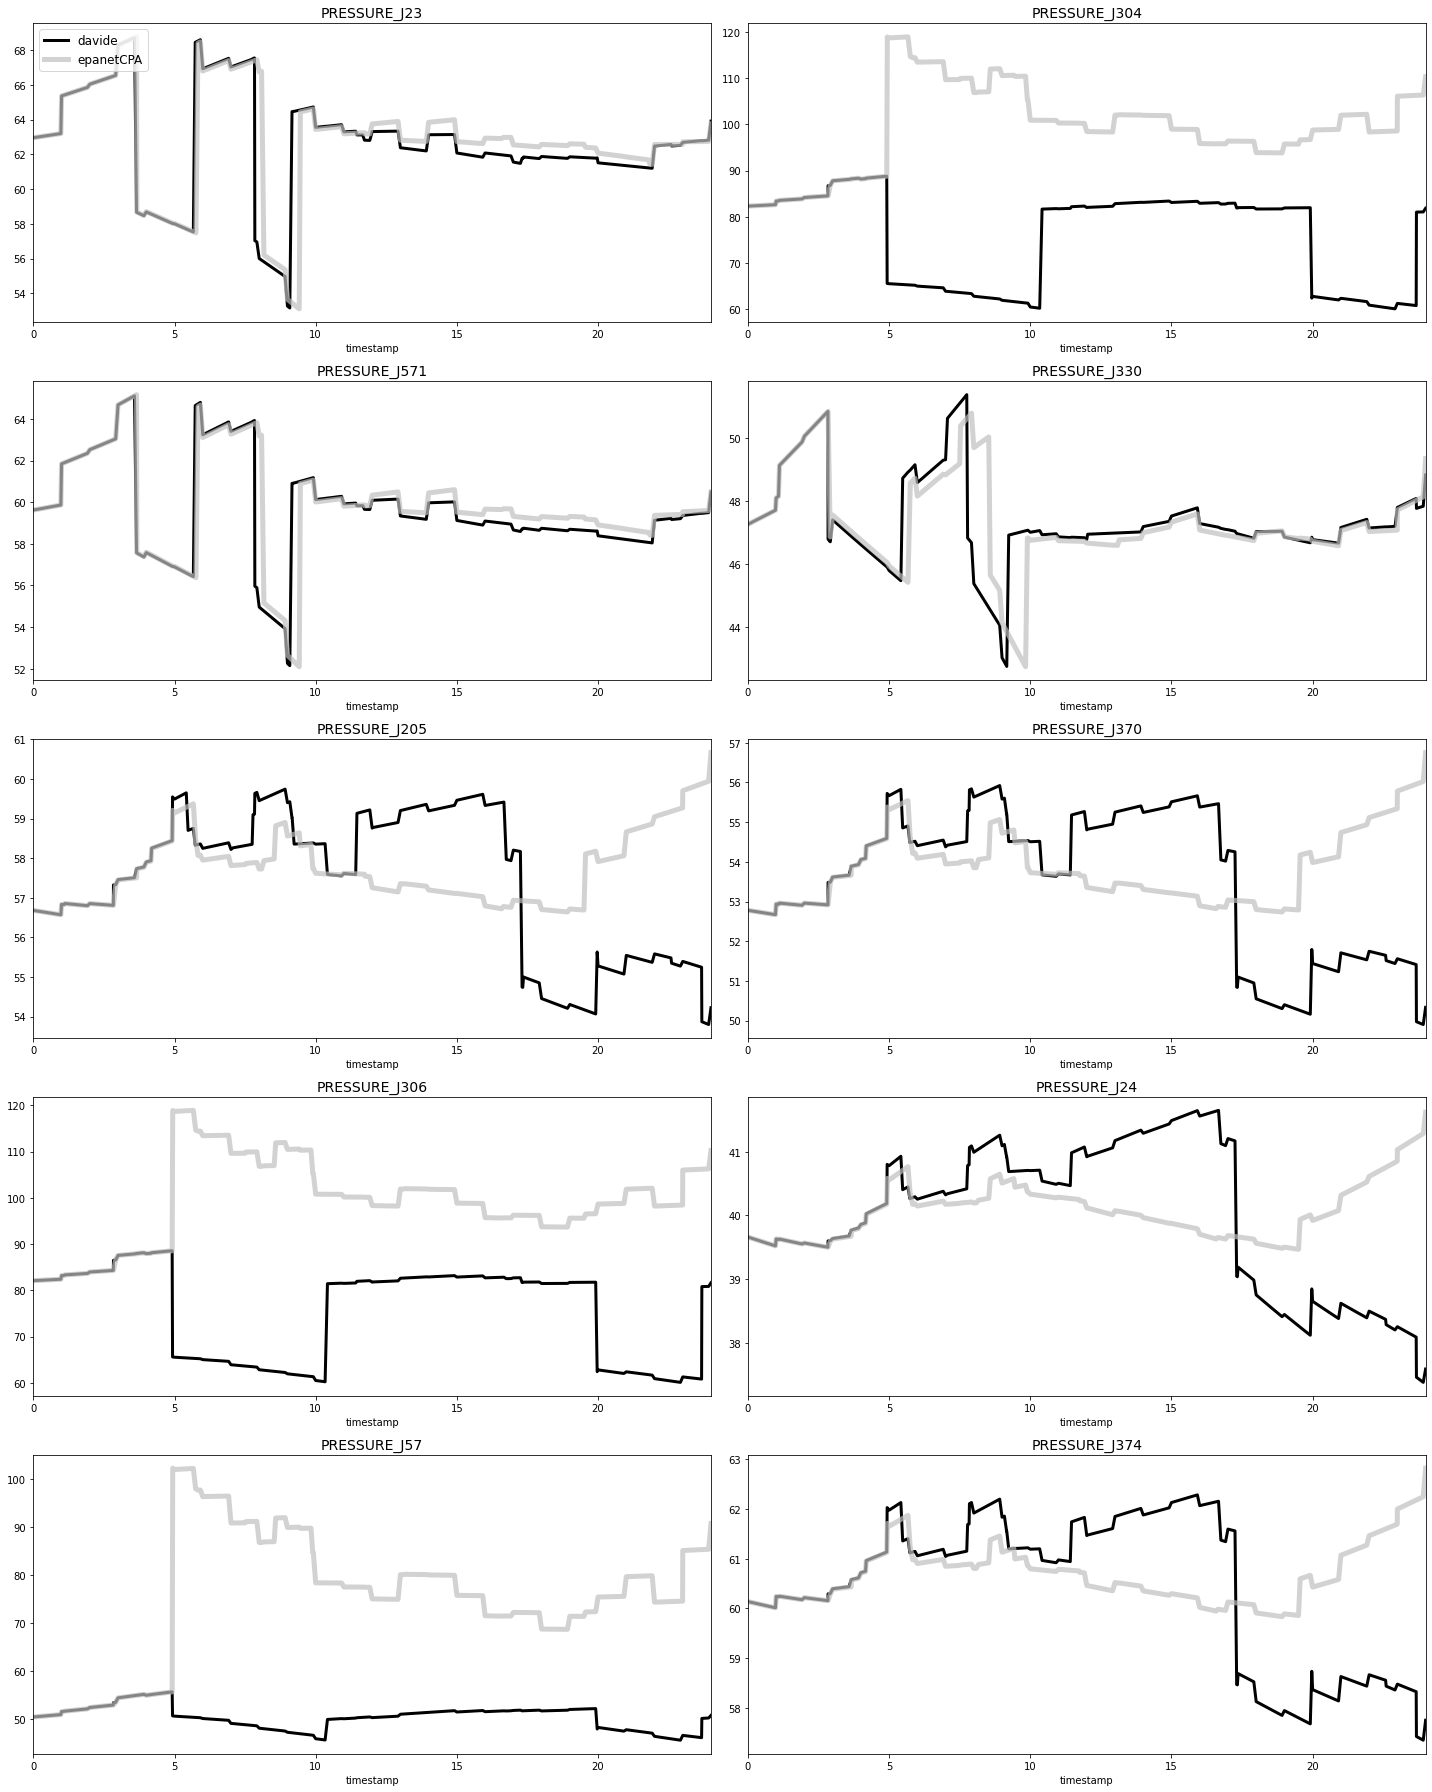

In [12]:
df_junctions = df.iloc[:, df.columns.get_level_values(2)=='pressure']['junctions'].sample(10, axis=1, random_state=23)
df_junctions.index = np.round(df_junctions.index.total_seconds() / 3600, 4)

comparison_plots(df_junctions, df_ecpa, 'pressure')

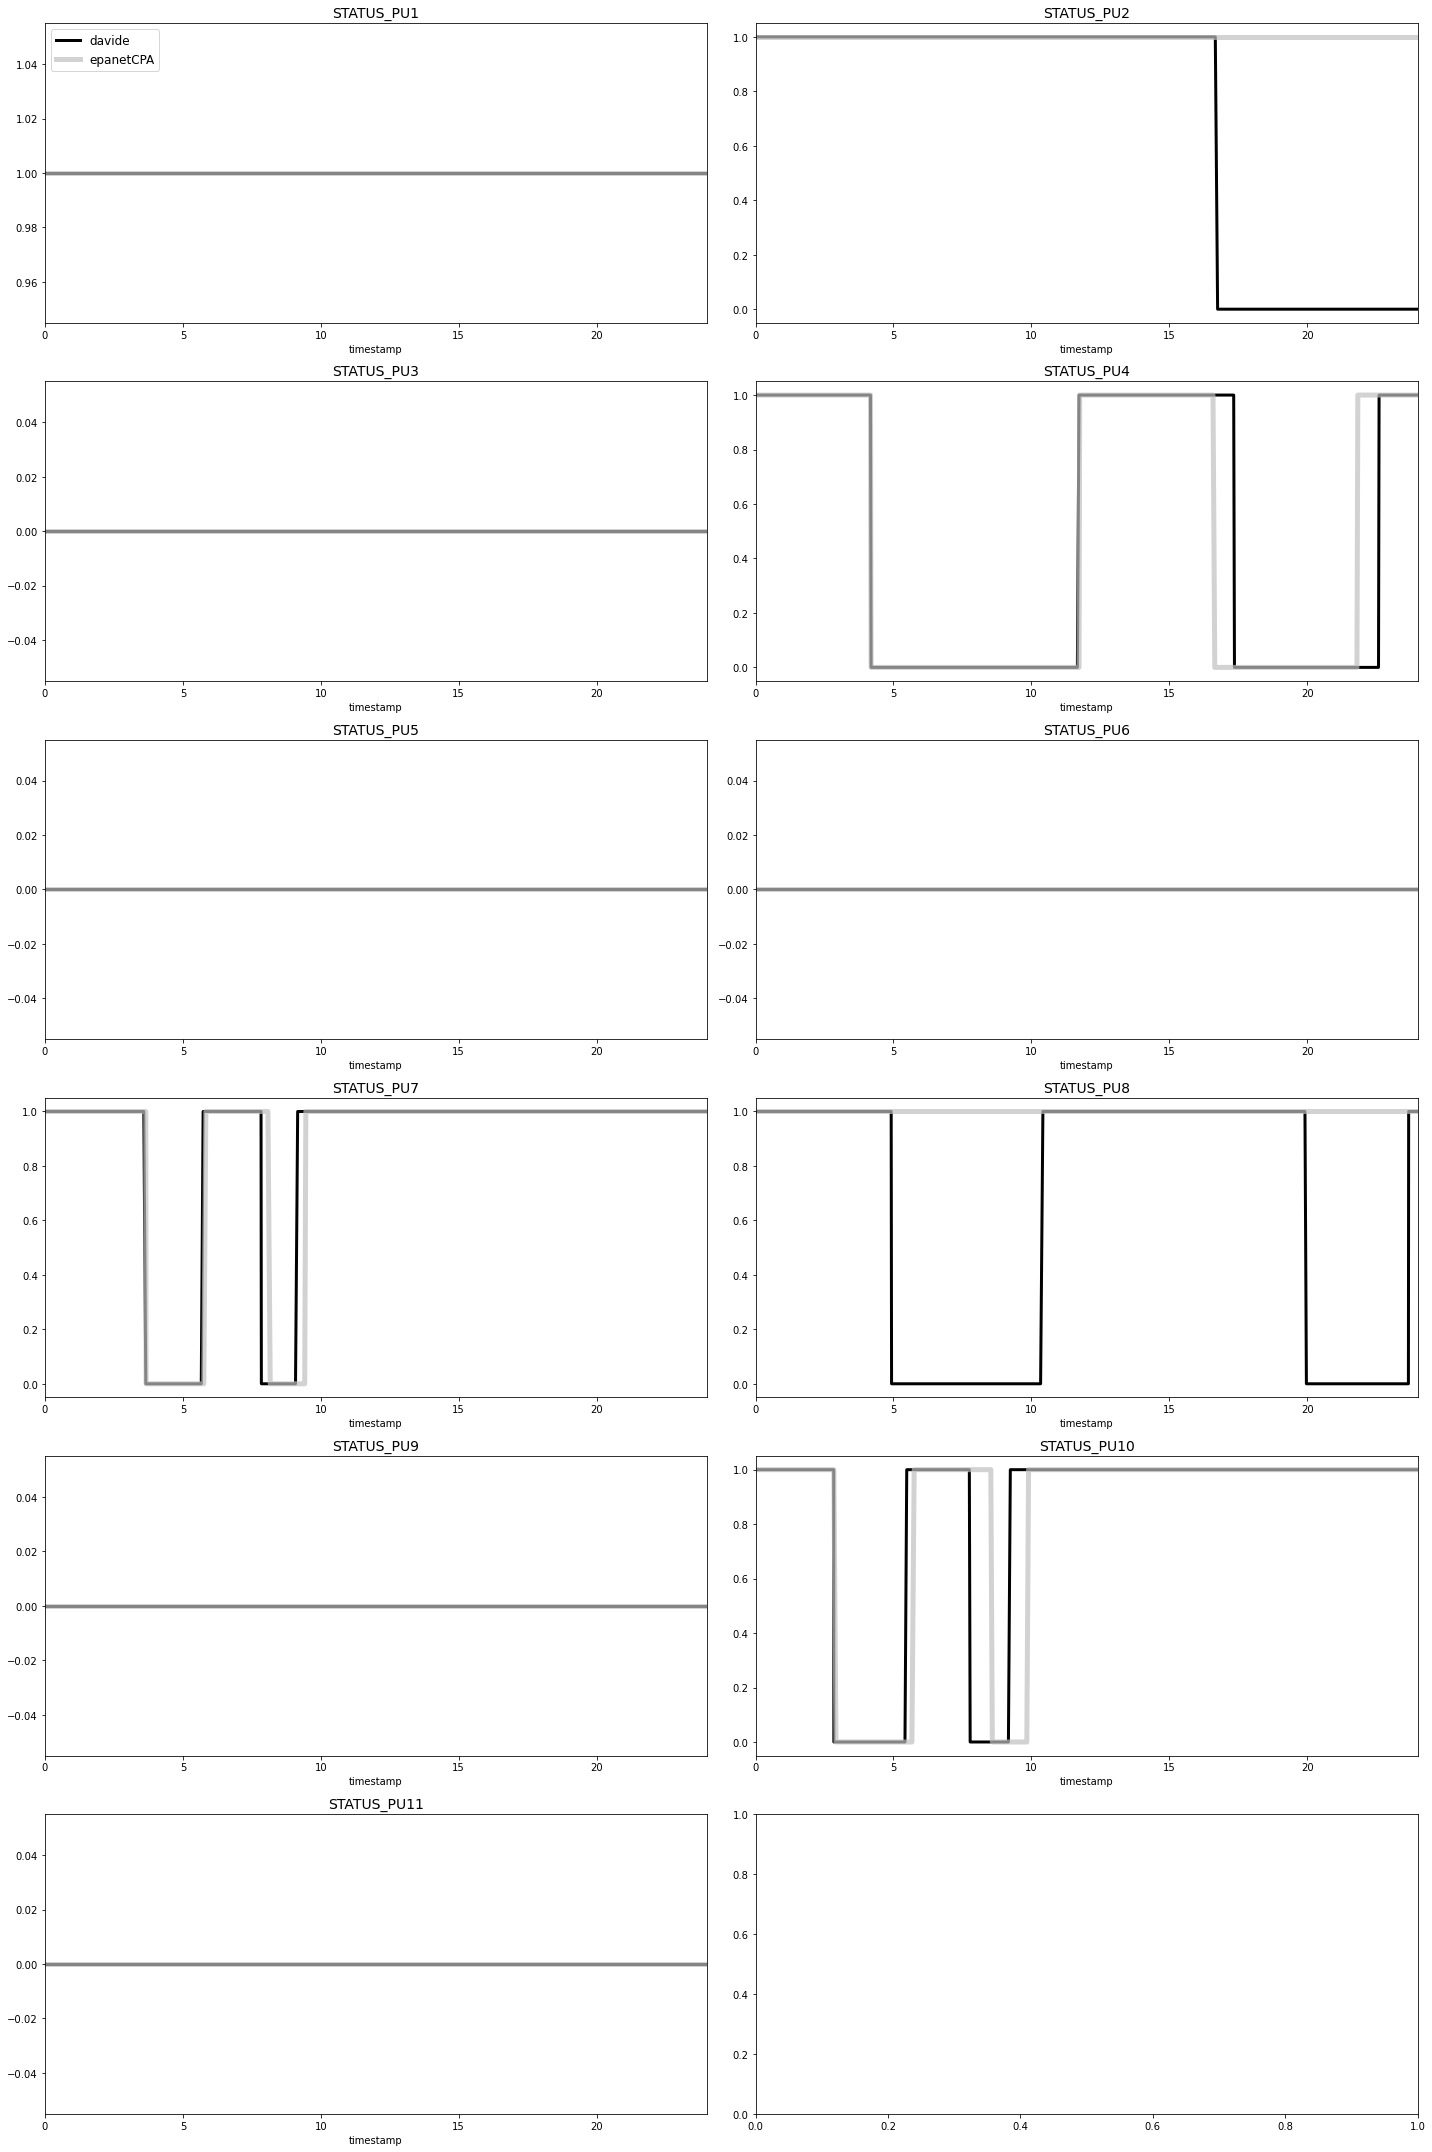

In [13]:
df_links = net.df_links_report
df_pumps = df_links.iloc[:, df_links.columns.get_level_values(2)=='status']['pumps']
df_pumps.index = np.round(df_pumps.index.total_seconds() / 3600, 4)

comparison_plots(df_pumps, df_ecpa, 'status')

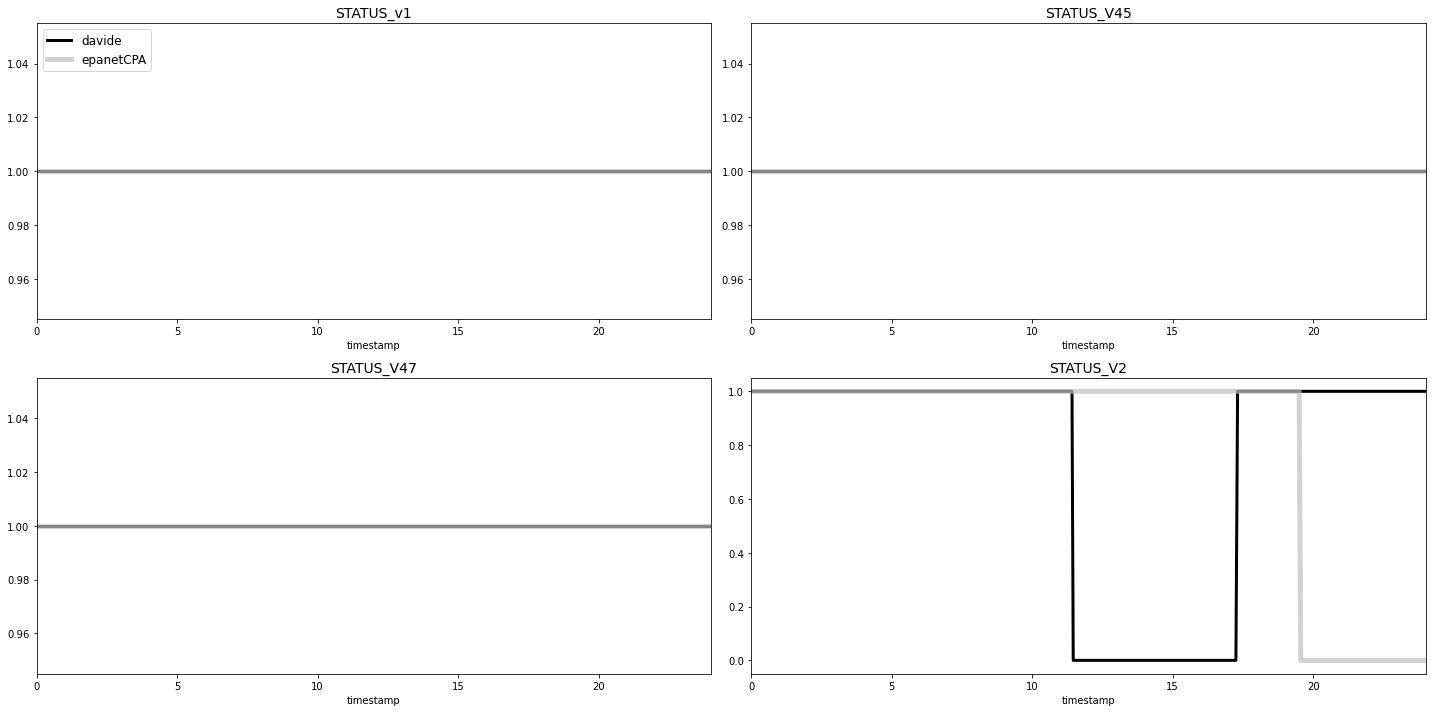

In [14]:
df_links = net.df_links_report
df_pumps = df_links.iloc[:, df_links.columns.get_level_values(2)=='status']['valves']
df_pumps.index = np.round(df_pumps.index.total_seconds() / 3600, 4)

comparison_plots(df_pumps, df_ecpa, 'status')

- SECOND SCENARIO: initial tank level initialization <br>
Problems: tanks {T5, T6, T7}, pumps {PU8, PU10}
            

In [15]:
tank_levels = [4, 3.75, 3.25, 3.75, 3.5, 3.5, 3]
for i, tank in enumerate(net.tanks):
    tank.tanklevel = tank_levels[i]

net.run(interactive=False)
df = net.df_nodes_report

In [16]:
df_ecpa = pd.read_csv("../epanetcpa_tanks_init.csv").set_index("timestamp")

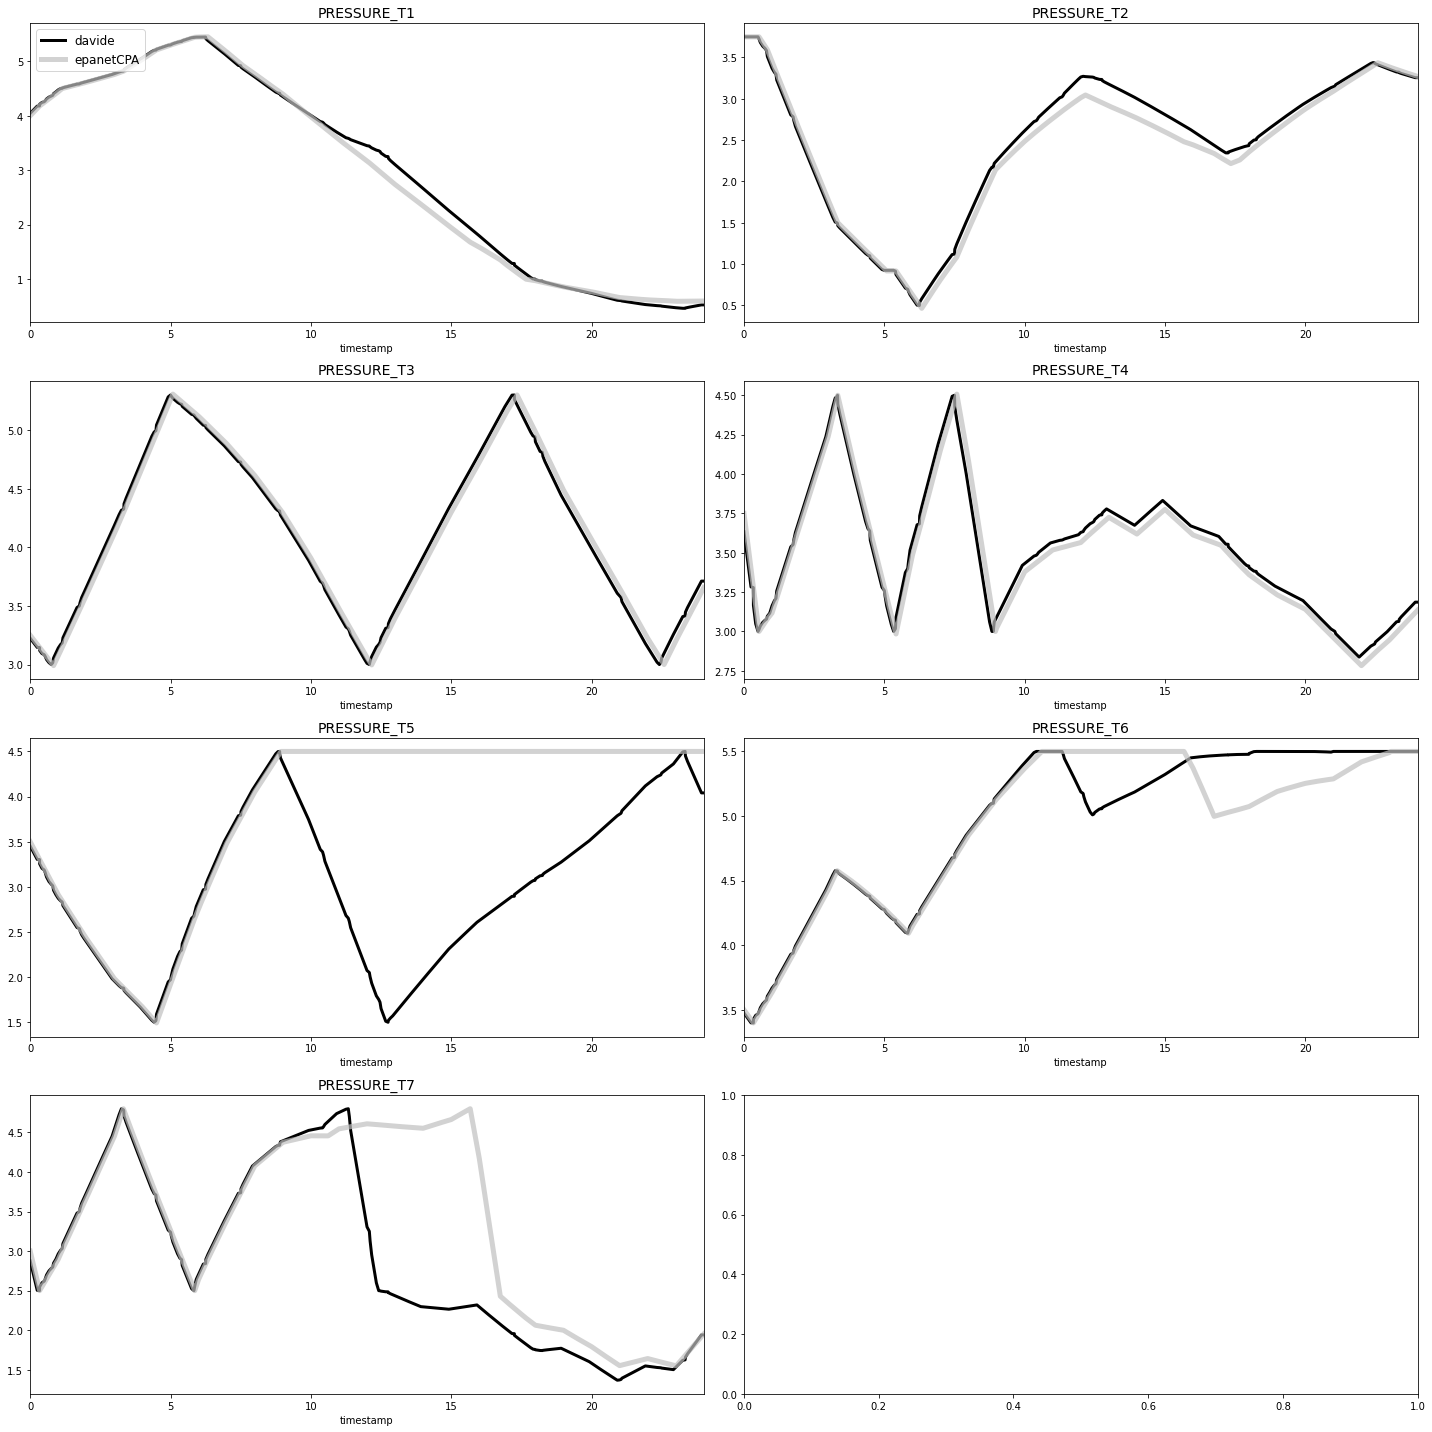

In [17]:
df_tanks = df.iloc[:, df.columns.get_level_values(2)=='pressure']['tanks']
df_tanks.index = np.round(df_tanks.index.total_seconds() / 3600, 4)

comparison_plots(df_tanks, df_ecpa, 'pressure')

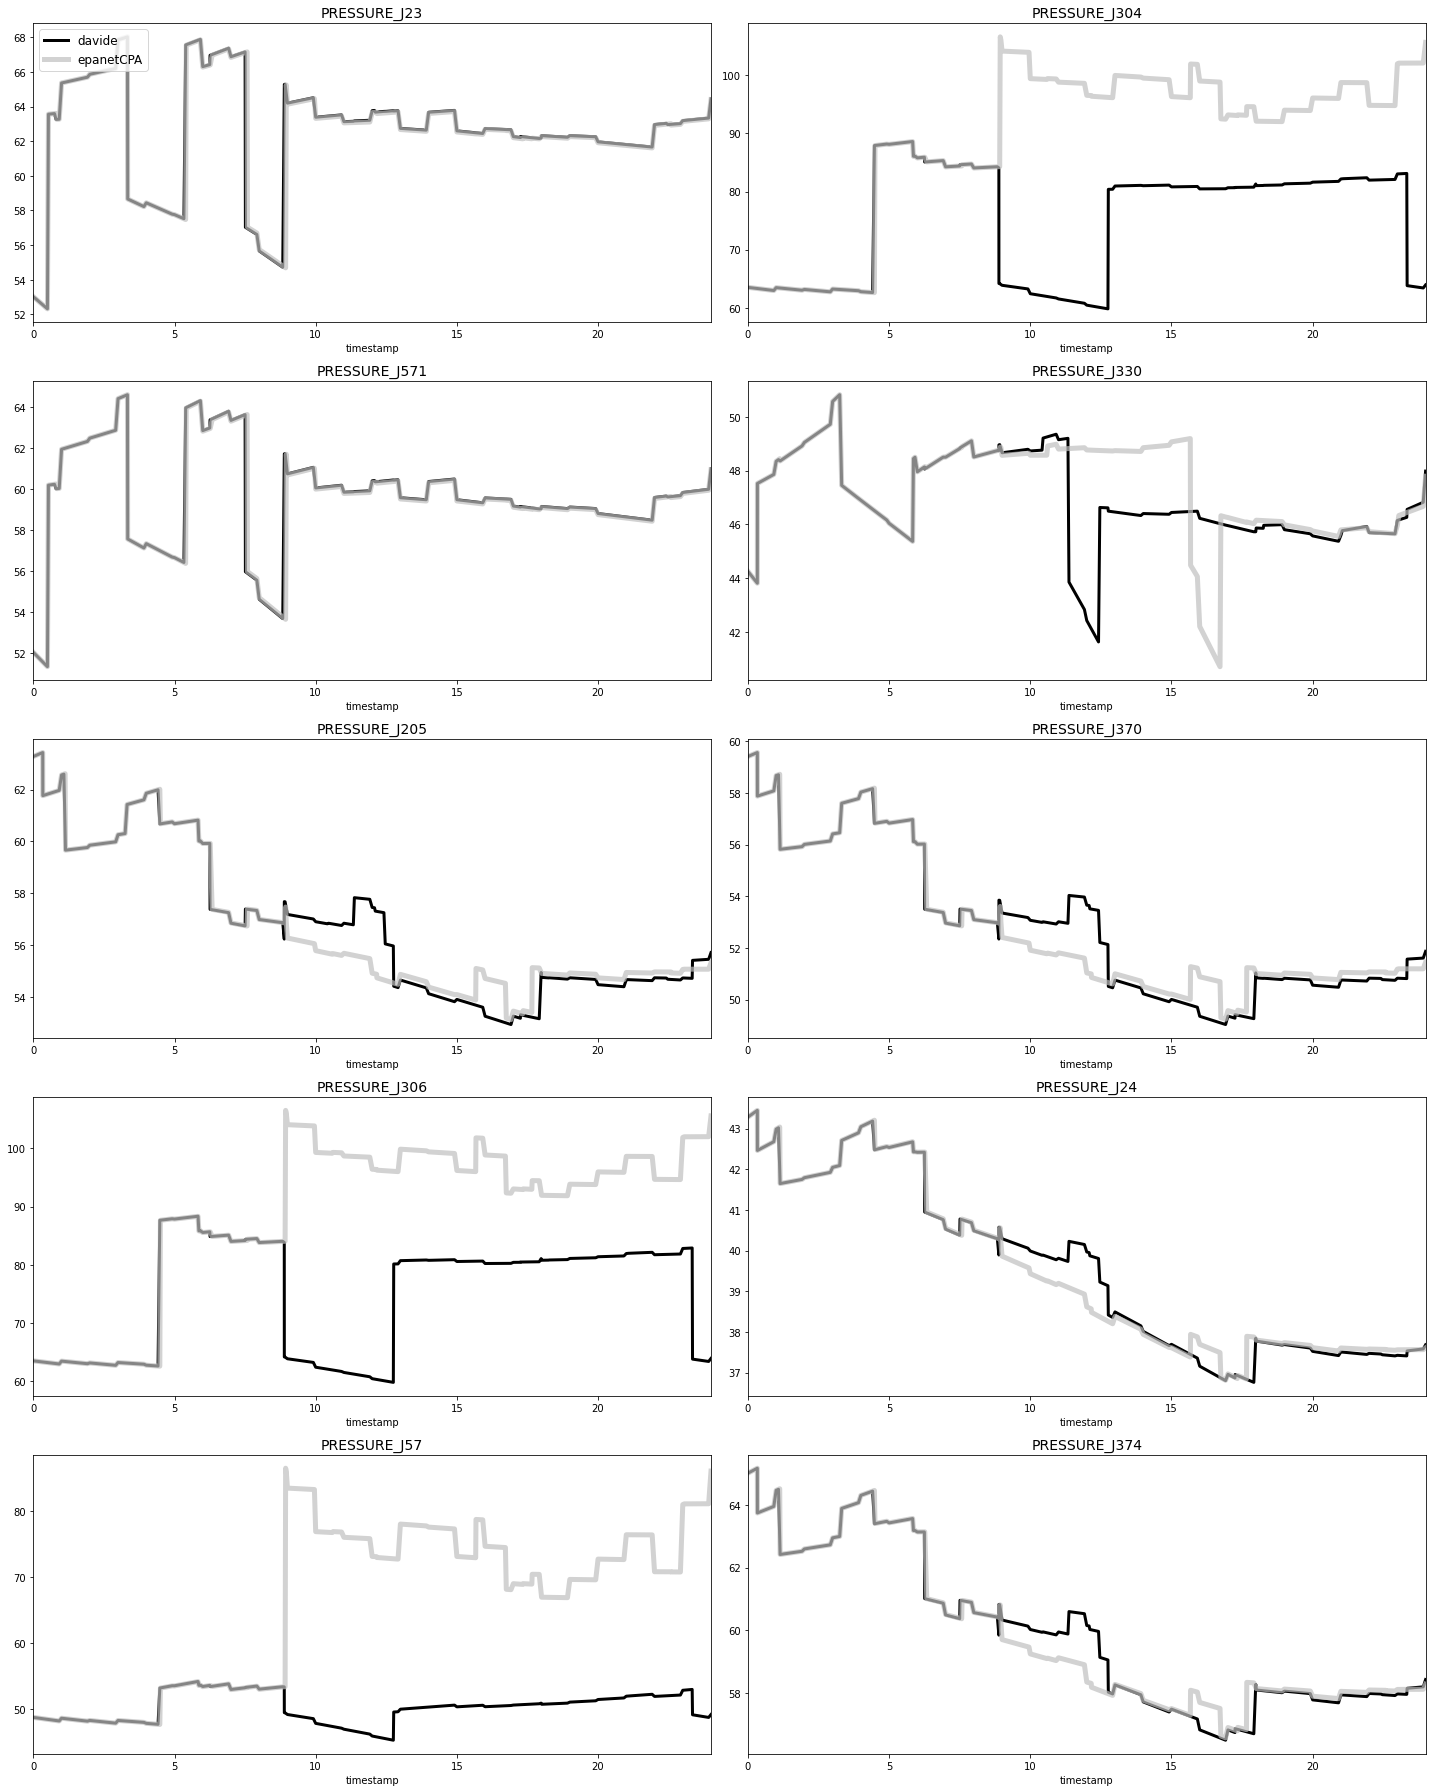

In [18]:
df_junctions = df.iloc[:, df.columns.get_level_values(2)=='pressure']['junctions'].sample(10, axis=1, random_state=23)
df_junctions.index = np.round(df_junctions.index.total_seconds() / 3600, 4)

comparison_plots(df_junctions, df_ecpa, 'pressure')

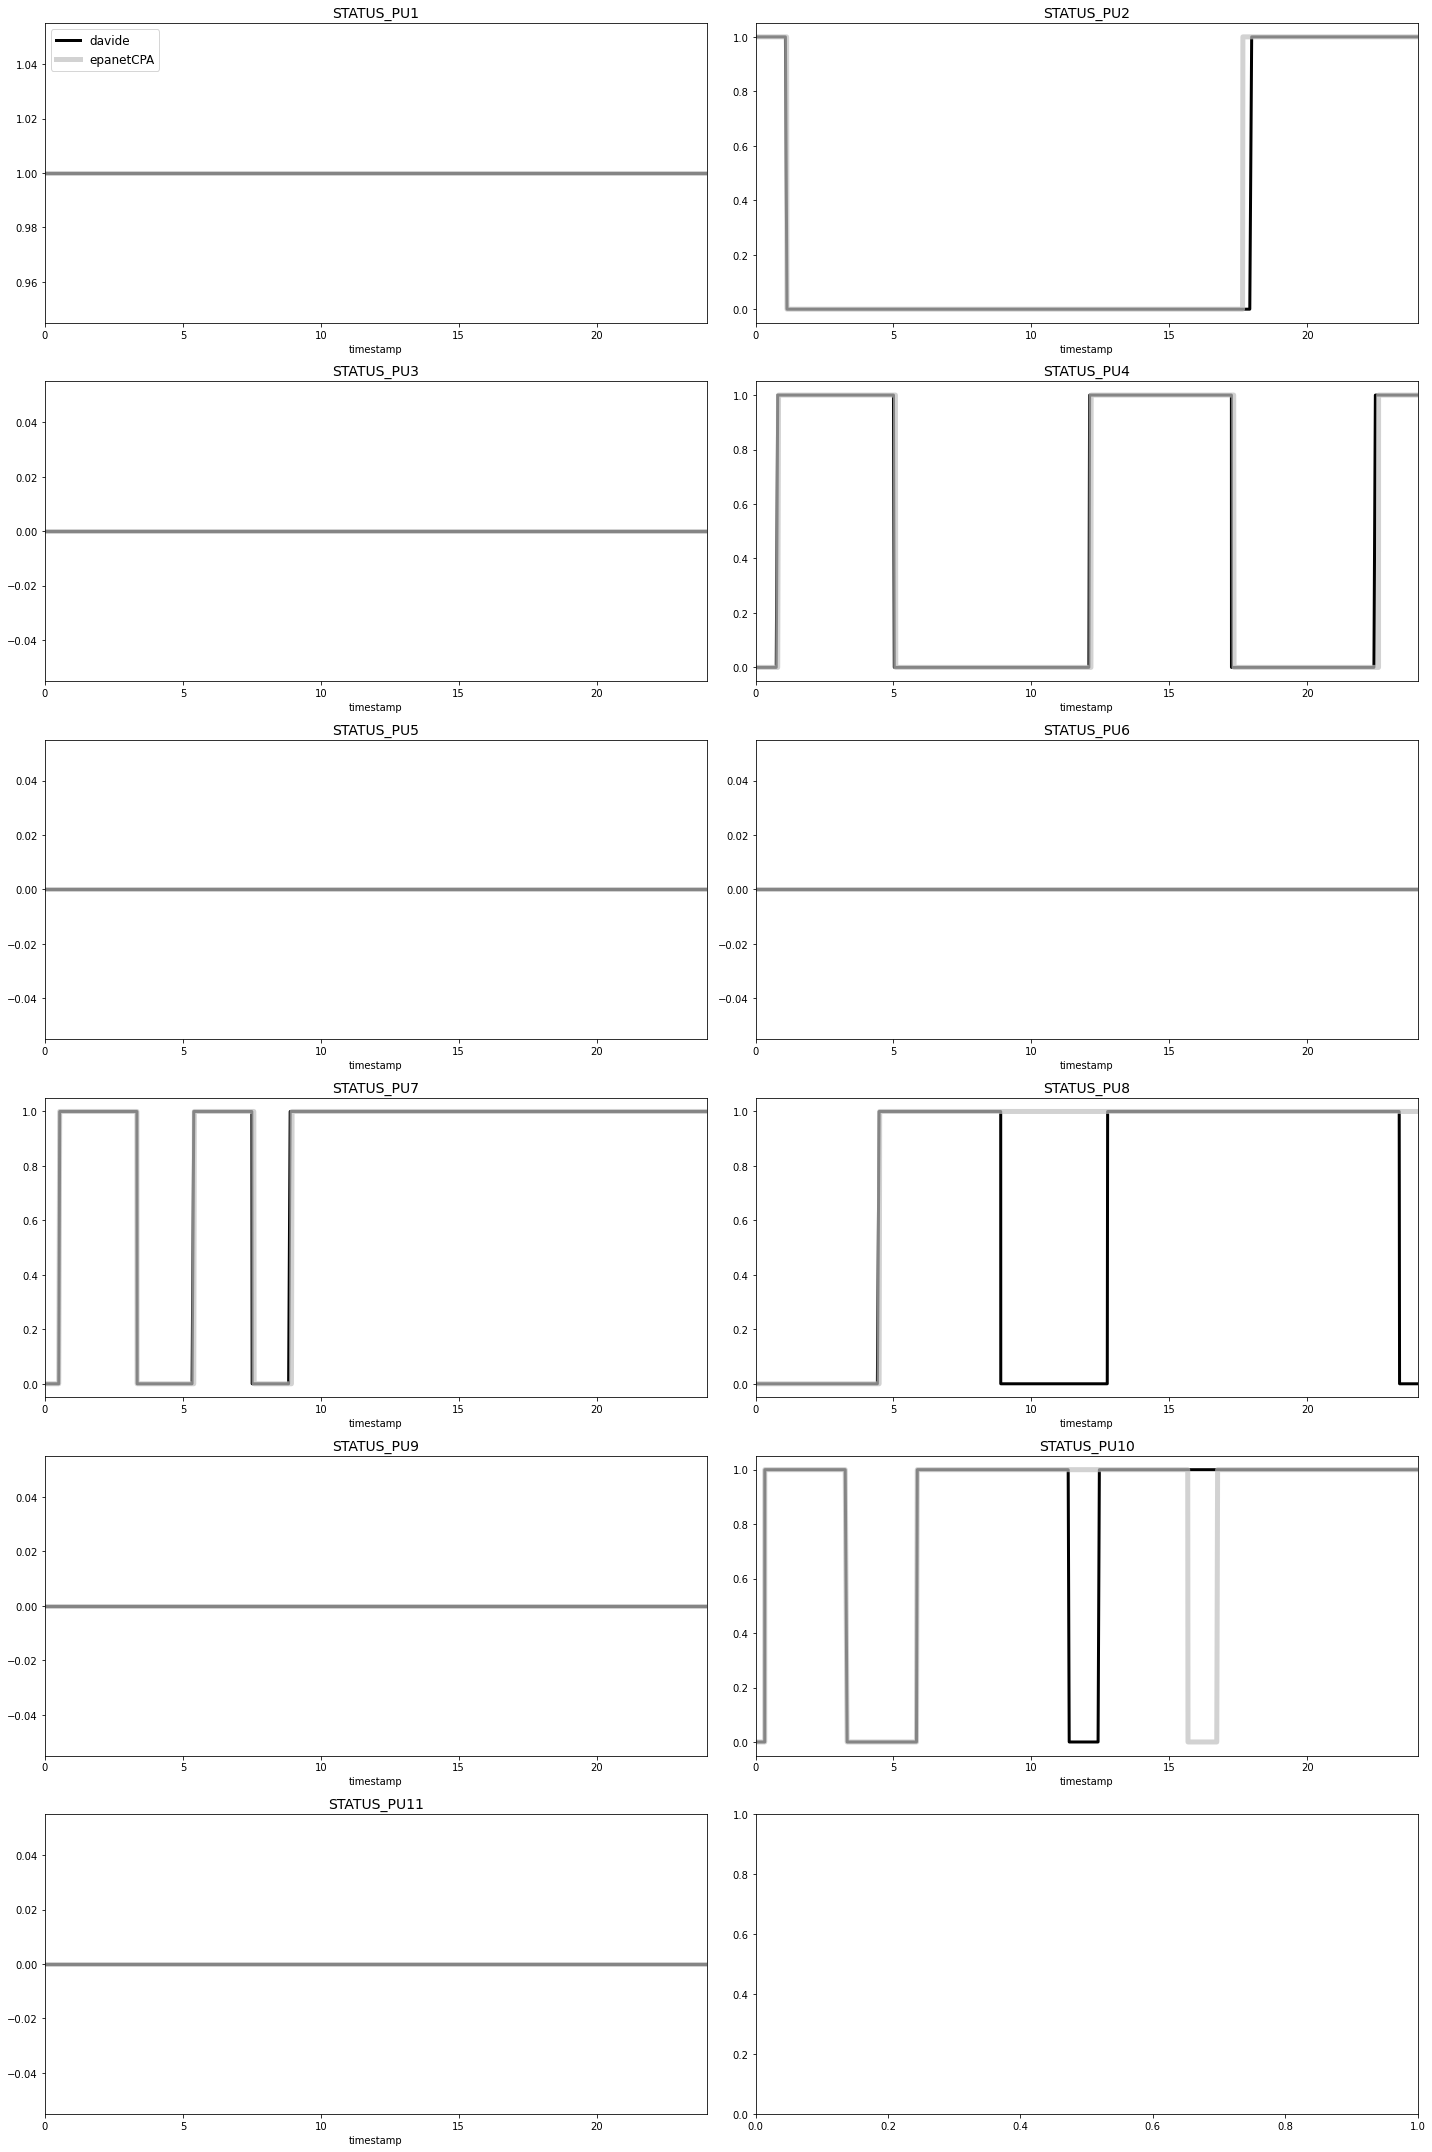

In [19]:
df_links = net.df_links_report
df_pumps = df_links.iloc[:, df_links.columns.get_level_values(2)=='status']['pumps']
df_pumps.index = np.round(df_pumps.index.total_seconds() / 3600, 4)

comparison_plots(df_pumps, df_ecpa, 'status')

- THIRD SCENARIO: demand pattern initialization and 72h simulation

In [20]:
net = net = network.WaterDistributionNetwork("ctown.inp")
net.set_time_params(duration=259200, hydraulic_step=300) # duration=72h, hydstep=10min

In [21]:
net.tanks

{'T1': <epynet.node.Tank at 0x1d55b85fb70>,
 'T2': <epynet.node.Tank at 0x1d55b85fb00>,
 'T3': <epynet.node.Tank at 0x1d55b85fa90>,
 'T4': <epynet.node.Tank at 0x1d55b85f898>,
 'T5': <epynet.node.Tank at 0x1d55b85f978>,
 'T6': <epynet.node.Tank at 0x1d55b85f908>,
 'T7': <epynet.node.Tank at 0x1d55b85f828>}

In [22]:
tank_levels = [4, 3.75, 3.25, 3.75, 3.5, 3.5, 3]
for i, tank in enumerate(net.tanks):
    tank.tanklevel = tank_levels[i]

In [23]:
net.run(interactive=False)

In [24]:
df = net.df_nodes_report
df_ecpa = pd.read_csv("../epanetcpa_with_patterns.csv").set_index("timestamp")

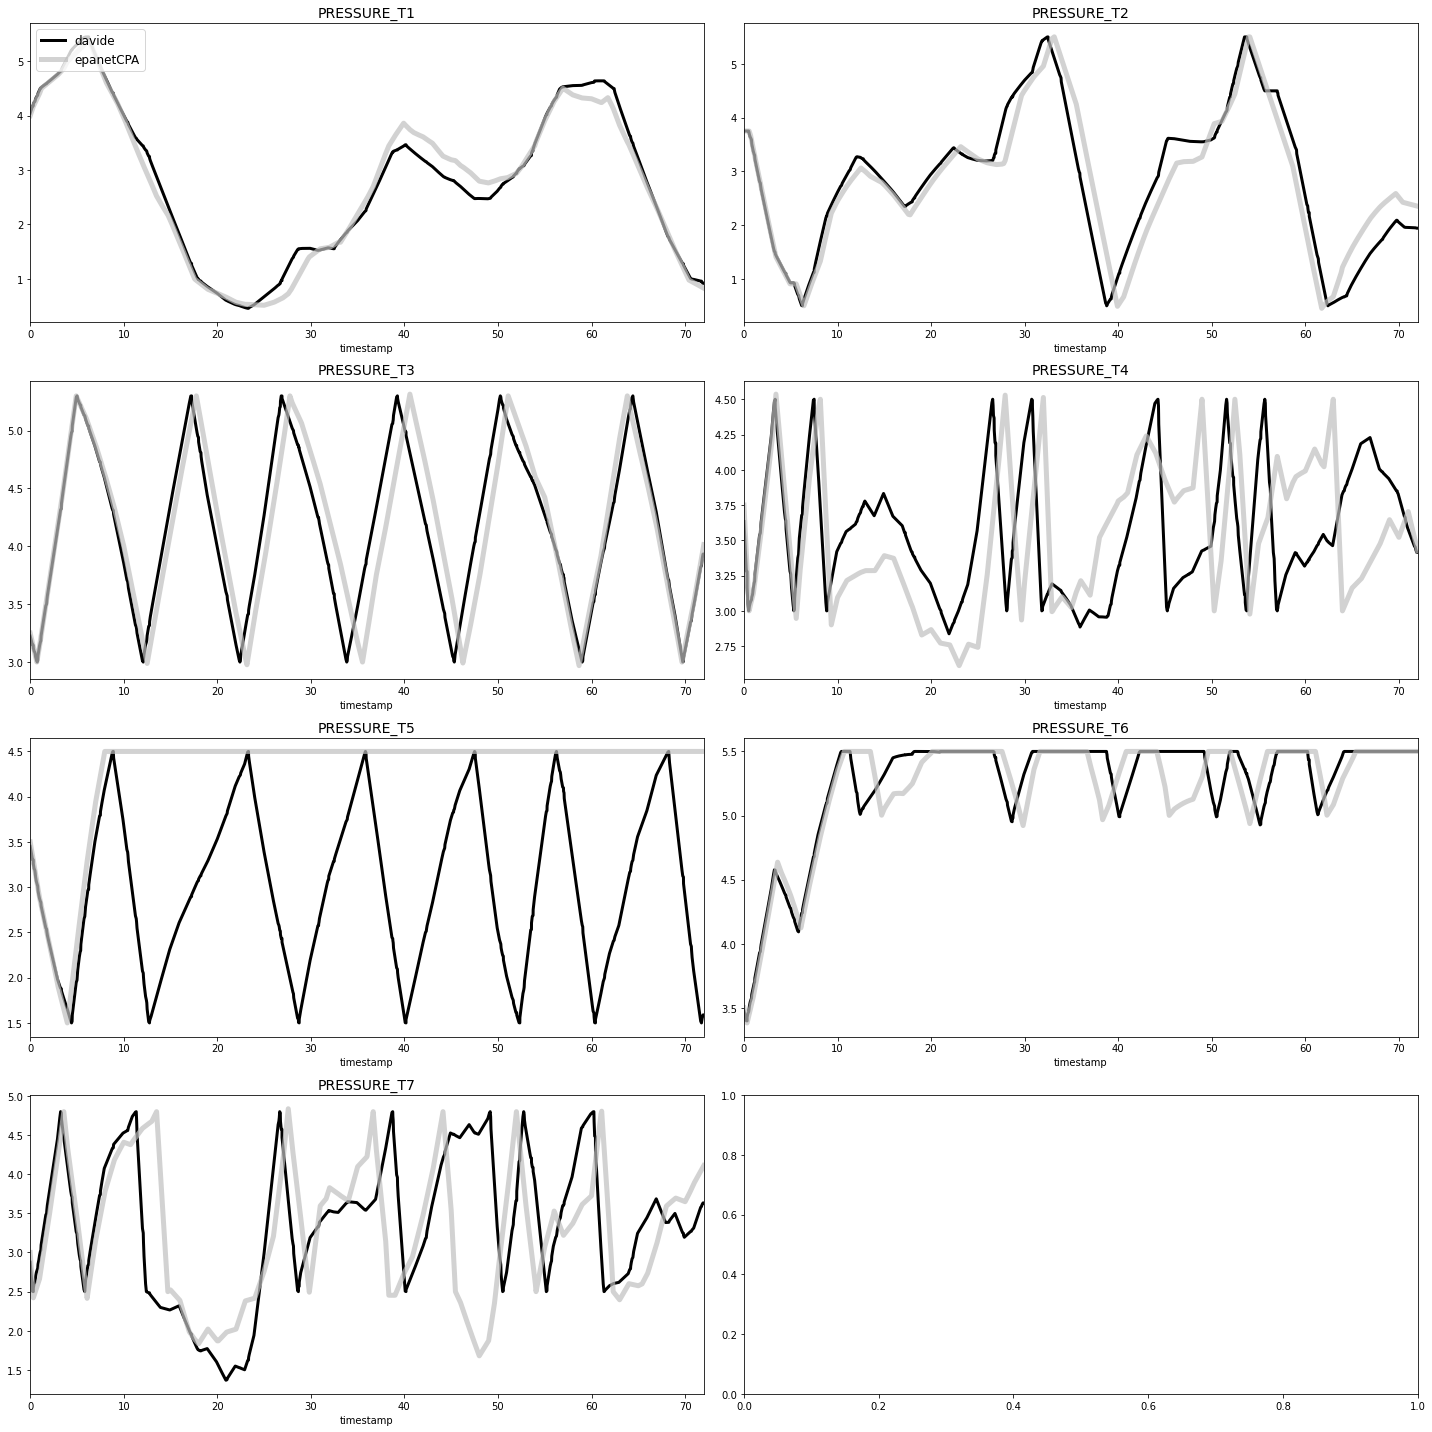

In [25]:
df_tanks = df.iloc[:, df.columns.get_level_values(2)=='pressure']['tanks']
df_tanks.index = np.round(df_tanks.index.total_seconds() / 3600, 4)

comparison_plots(df_tanks, df_ecpa, 'pressure')

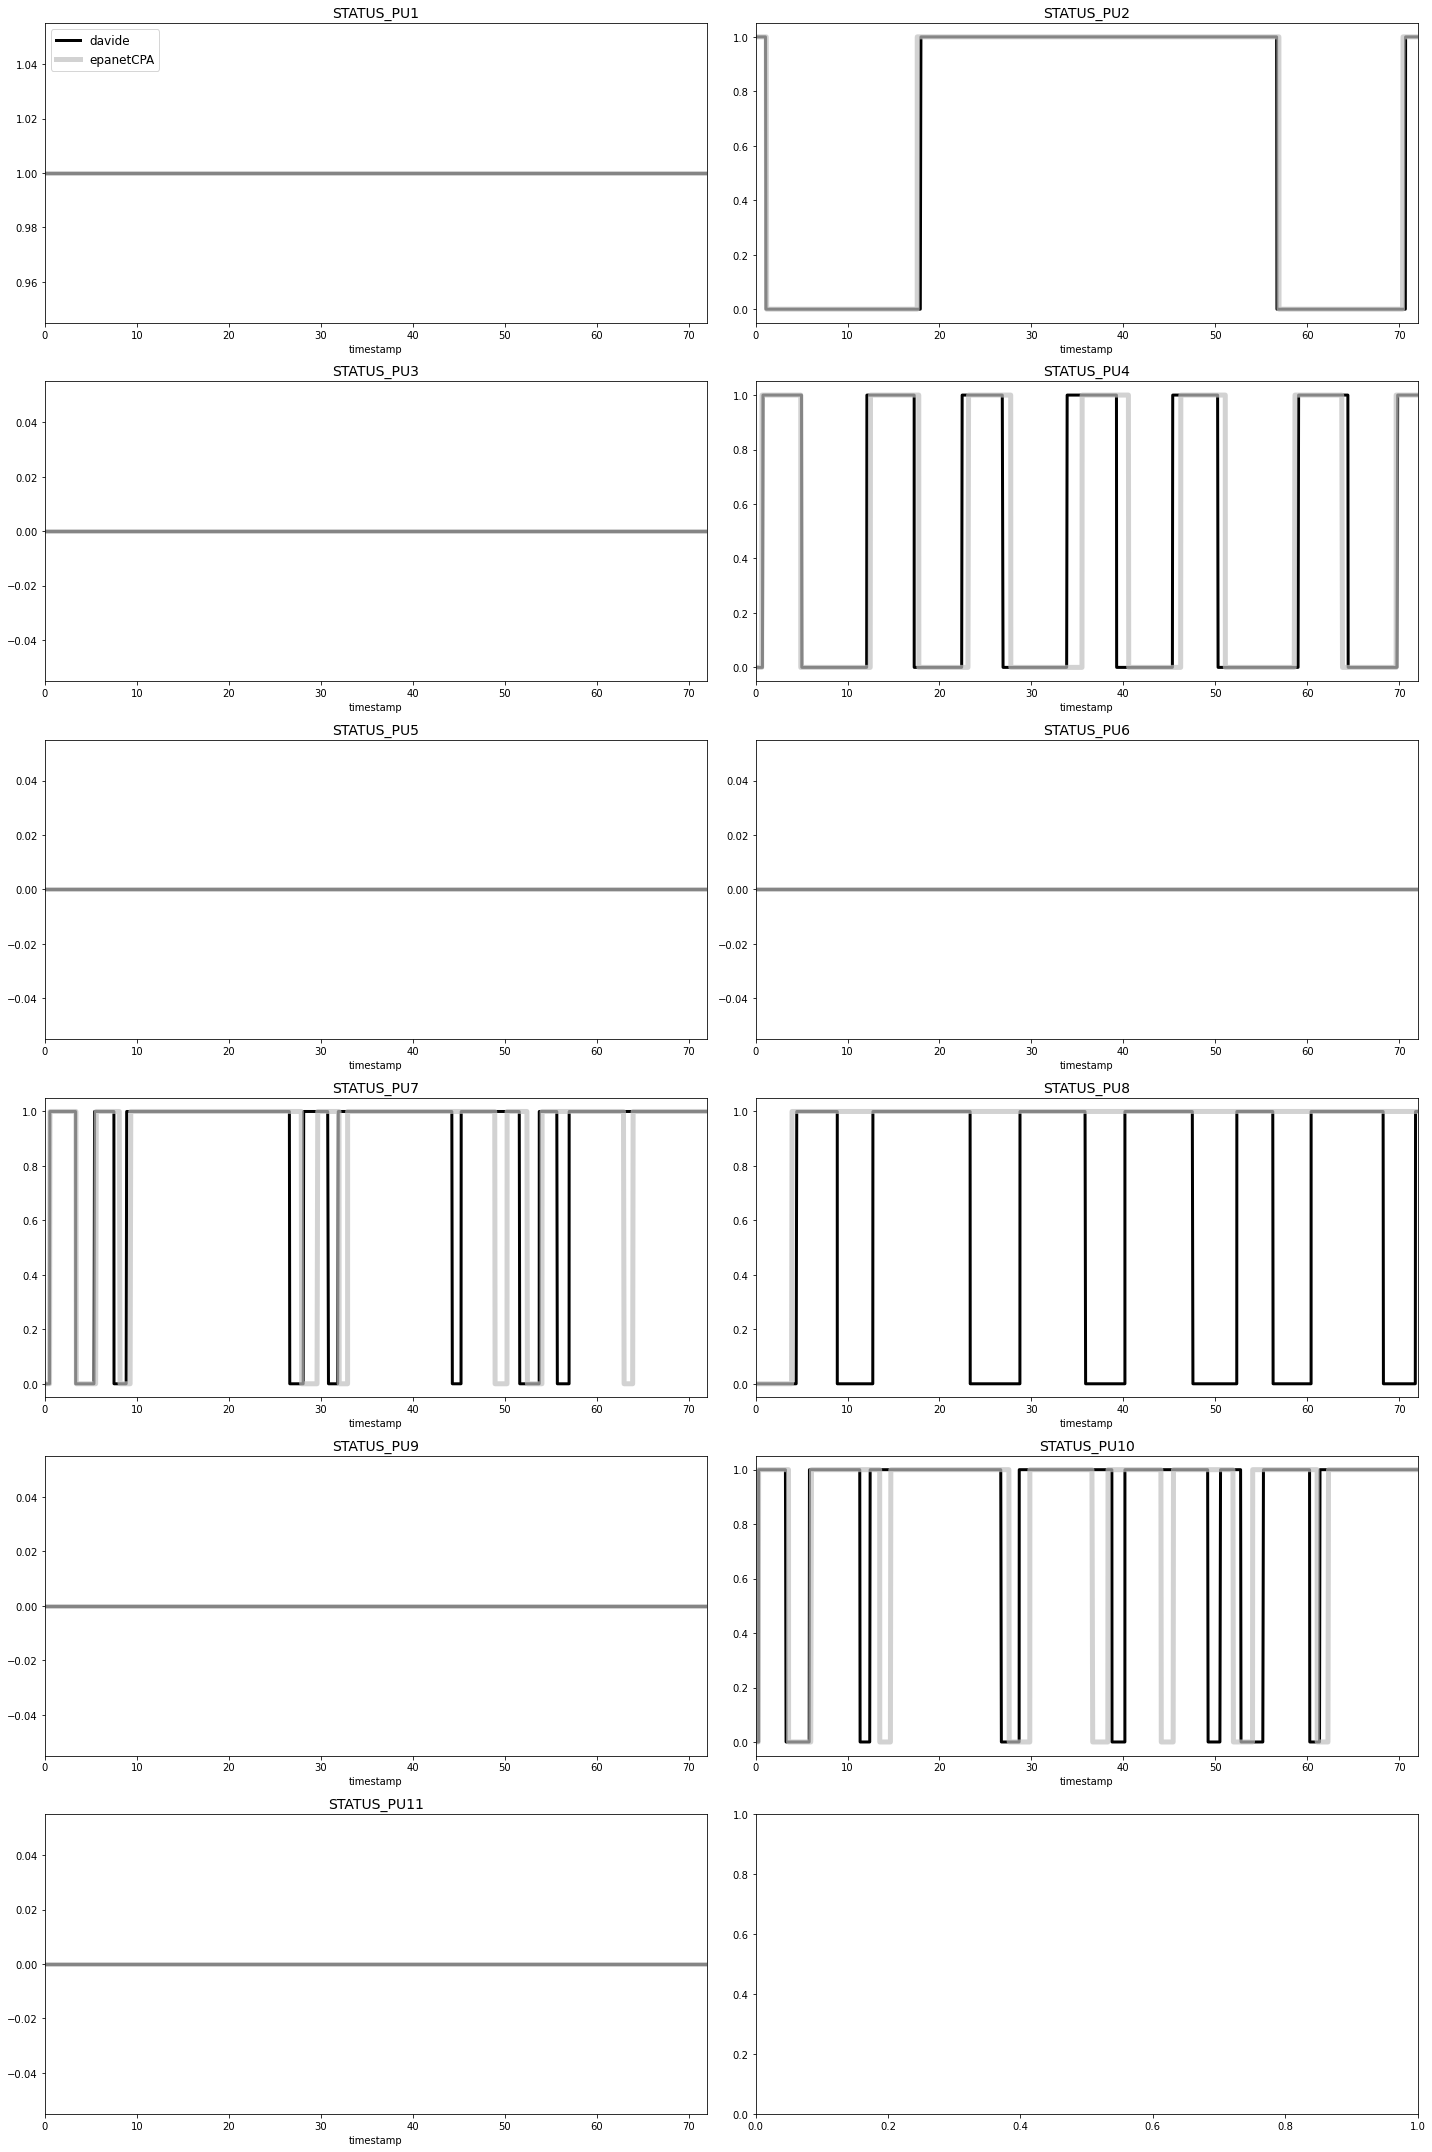

In [26]:
df_links = net.df_links_report
df_pumps = df_links.iloc[:, df_links.columns.get_level_values(2)=='status']['pumps']
df_pumps.index = np.round(df_pumps.index.total_seconds() / 3600, 4)

comparison_plots(df_pumps, df_ecpa, 'status')

#### Comparing pressure driven analysis (no_init scenario)
Remember to comment out the T5-PU8 rule if above 4.5 on .inp file

In [9]:
net = network.WaterDistributionNetwork("ctown_pd.inp")
net.set_time_params(duration=86400, hydraulic_step=300) # duration=24h, hydstep=10min

In [10]:
net.run(interactive=False)

In [11]:
df = net.df_nodes_report

In [12]:
df_ecpa = pd.read_csv("../epanetcpa_no_init_pd.csv").set_index("timestamp")

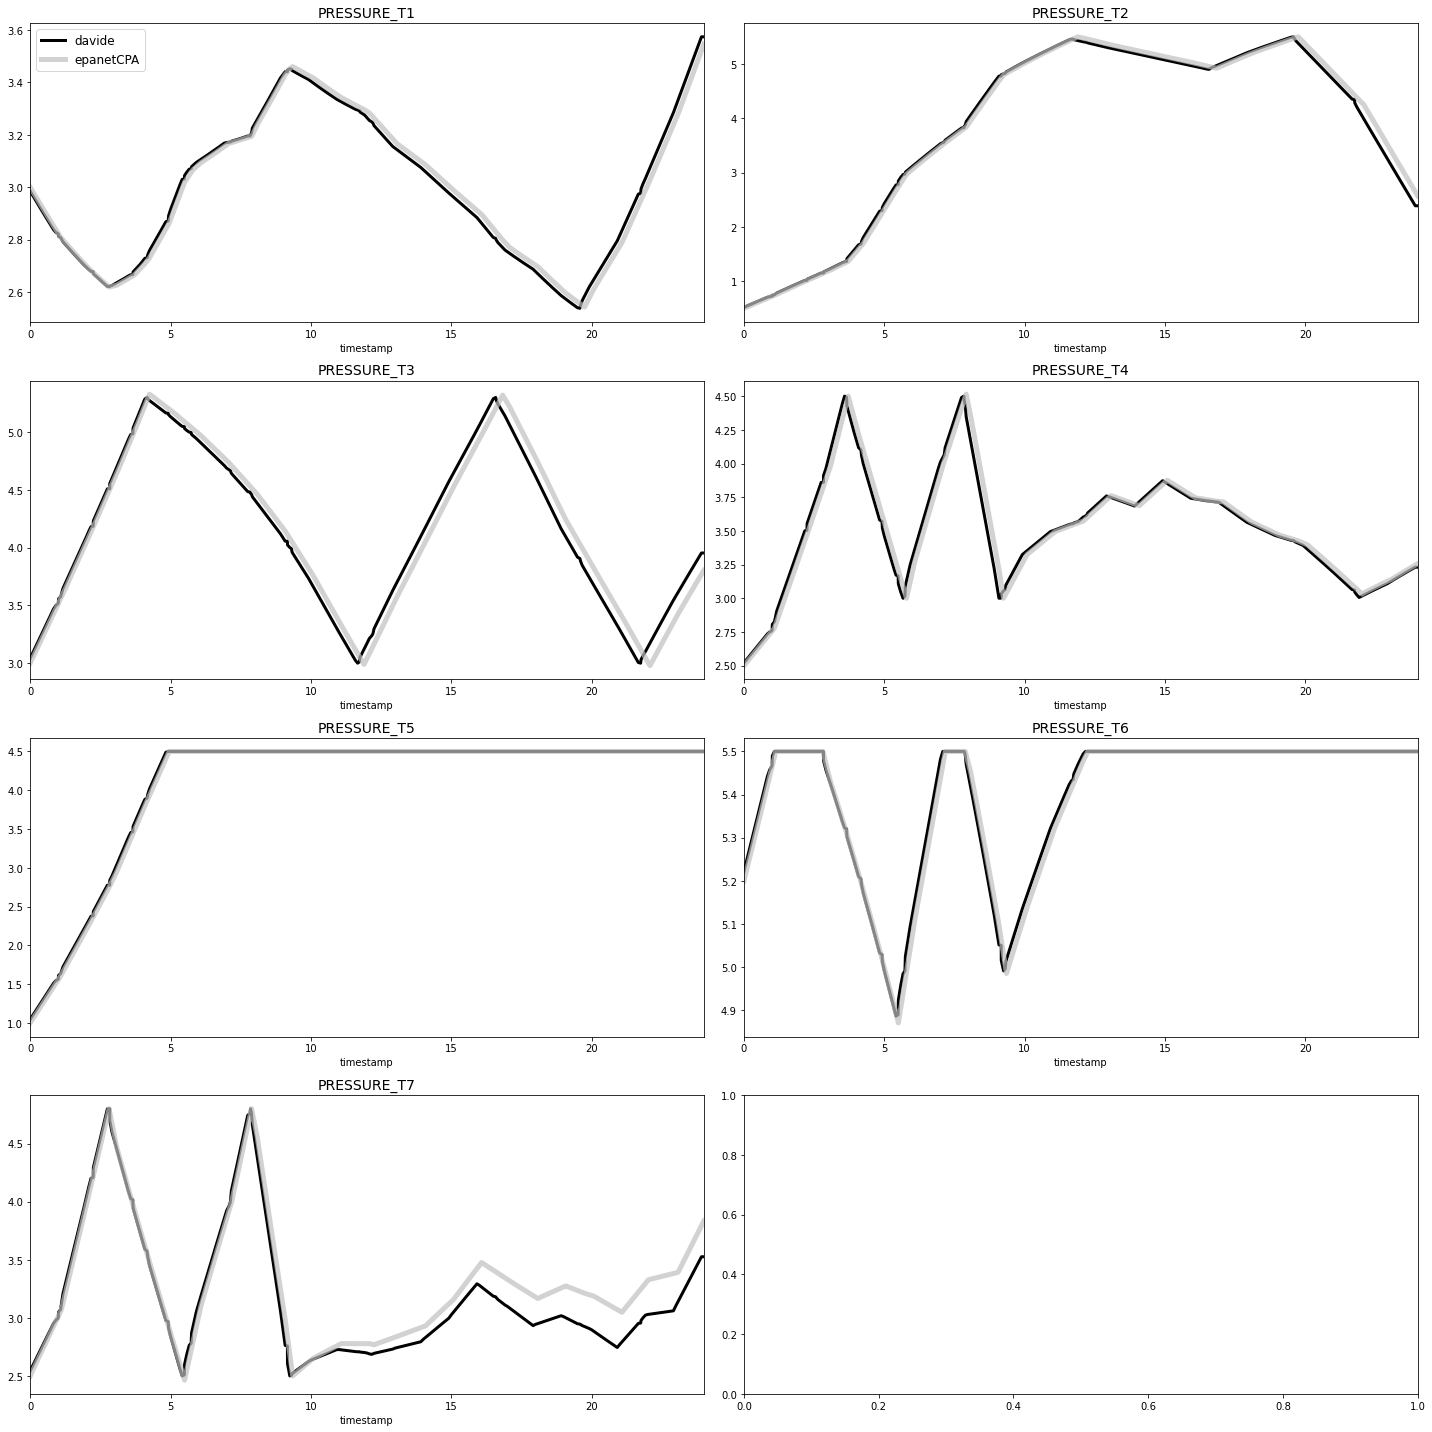

In [13]:
df_tanks = df.iloc[:, df.columns.get_level_values(2)=='pressure']['tanks']
df_tanks.index = np.round(df_tanks.index.total_seconds() / 3600, 4)

comparison_plots(df_tanks, df_ecpa, 'pressure')

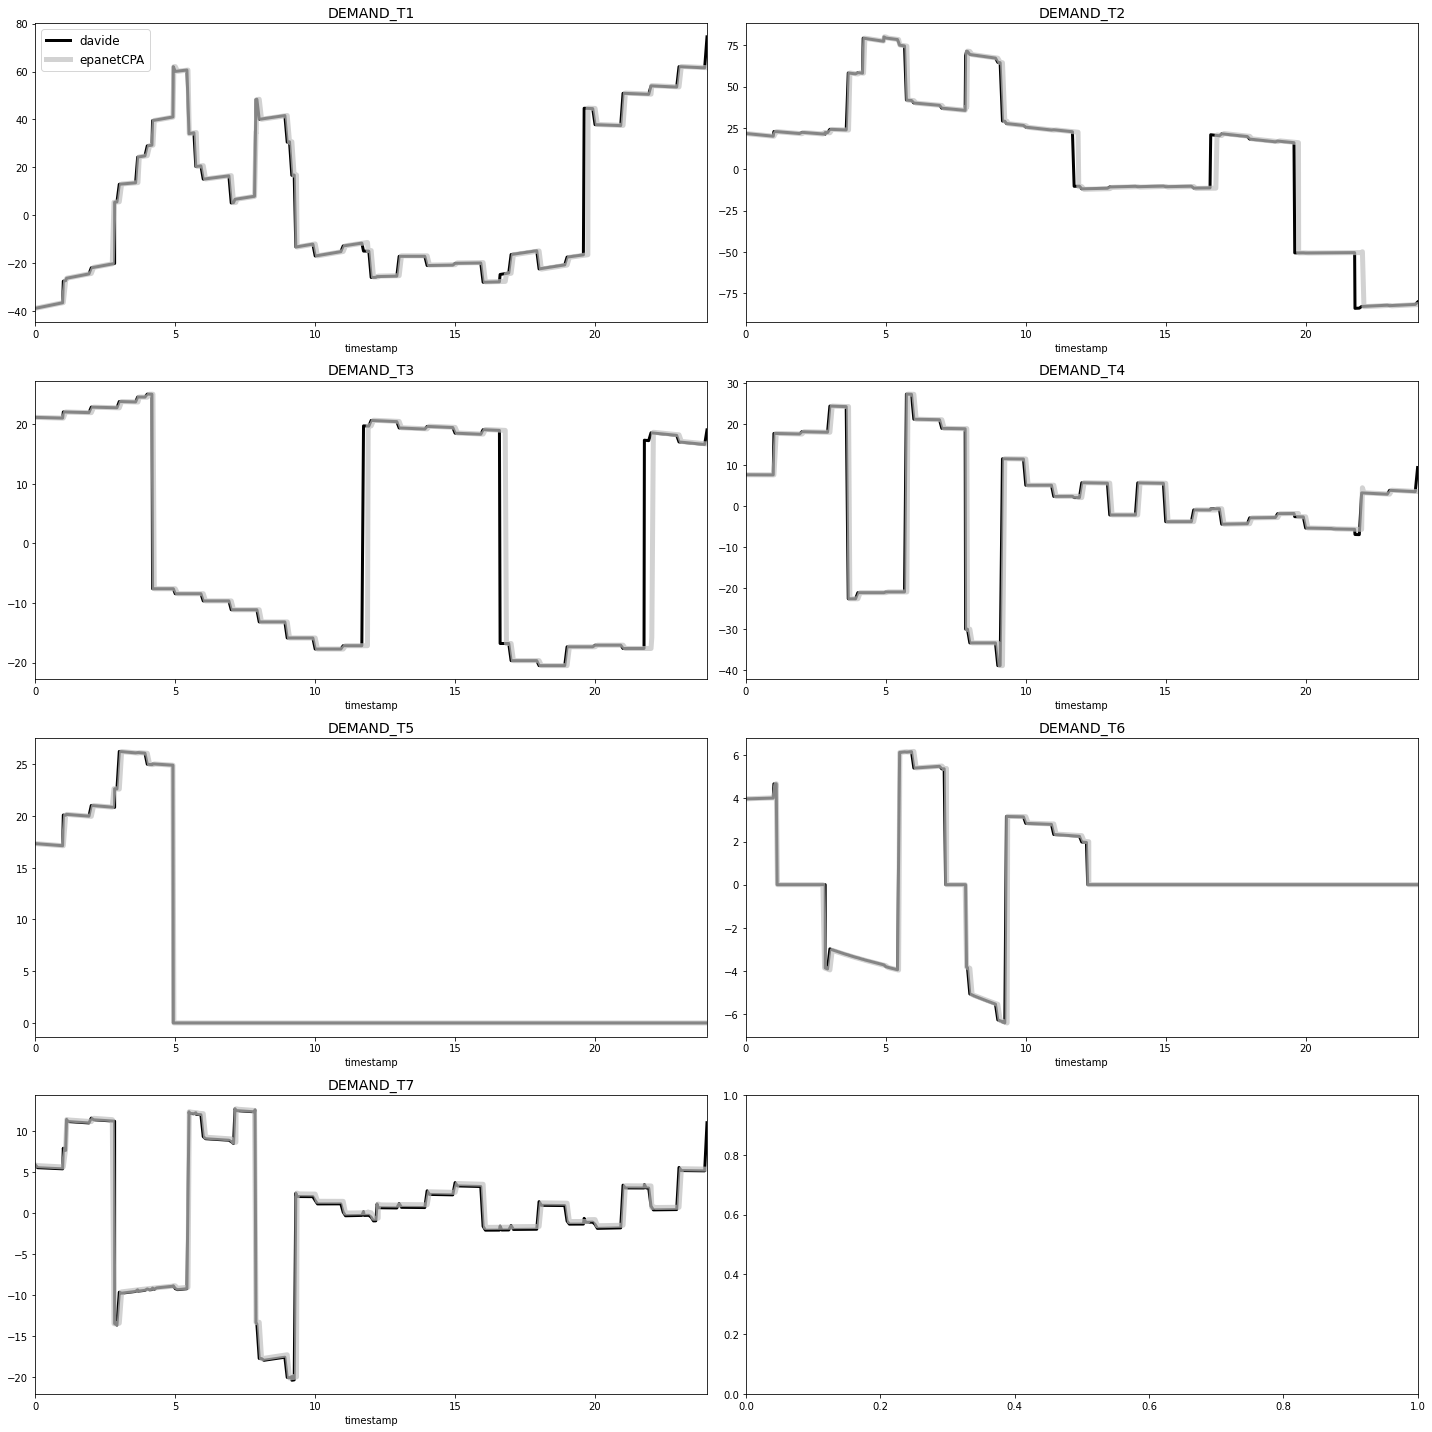

In [14]:
df_tanks = df.iloc[:, df.columns.get_level_values(2)=='demand']['tanks']
df_tanks.index = np.round(df_tanks.index.total_seconds() / 3600, 4)

comparison_plots(df_tanks, df_ecpa, 'demand')

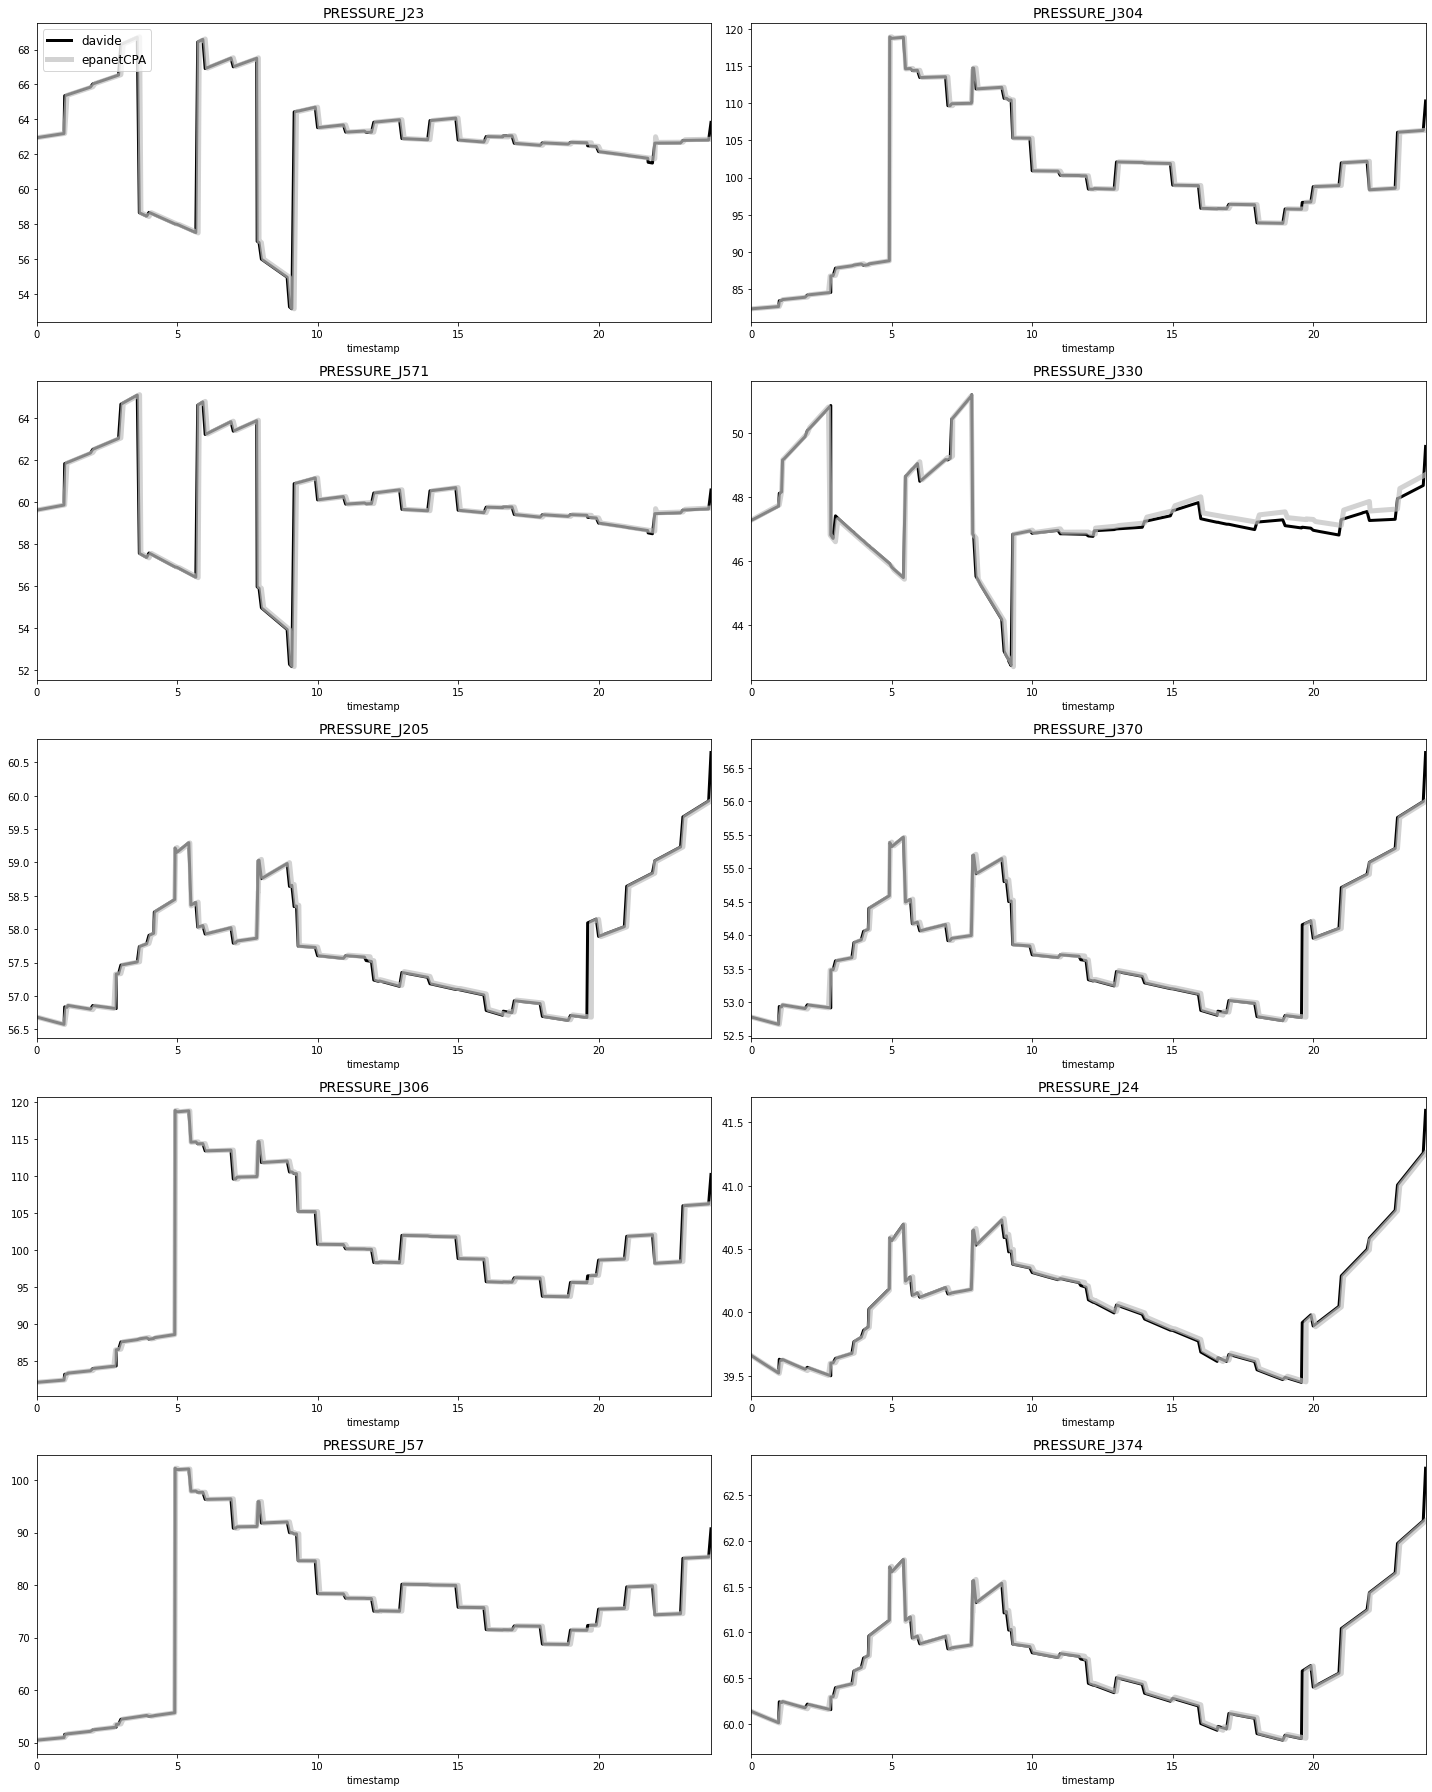

In [15]:
df_junctions = df.iloc[:, df.columns.get_level_values(2)=='pressure']['junctions'].sample(10, axis=1, random_state=23)
df_junctions.index = np.round(df_junctions.index.total_seconds() / 3600, 4)

comparison_plots(df_junctions, df_ecpa, 'pressure')

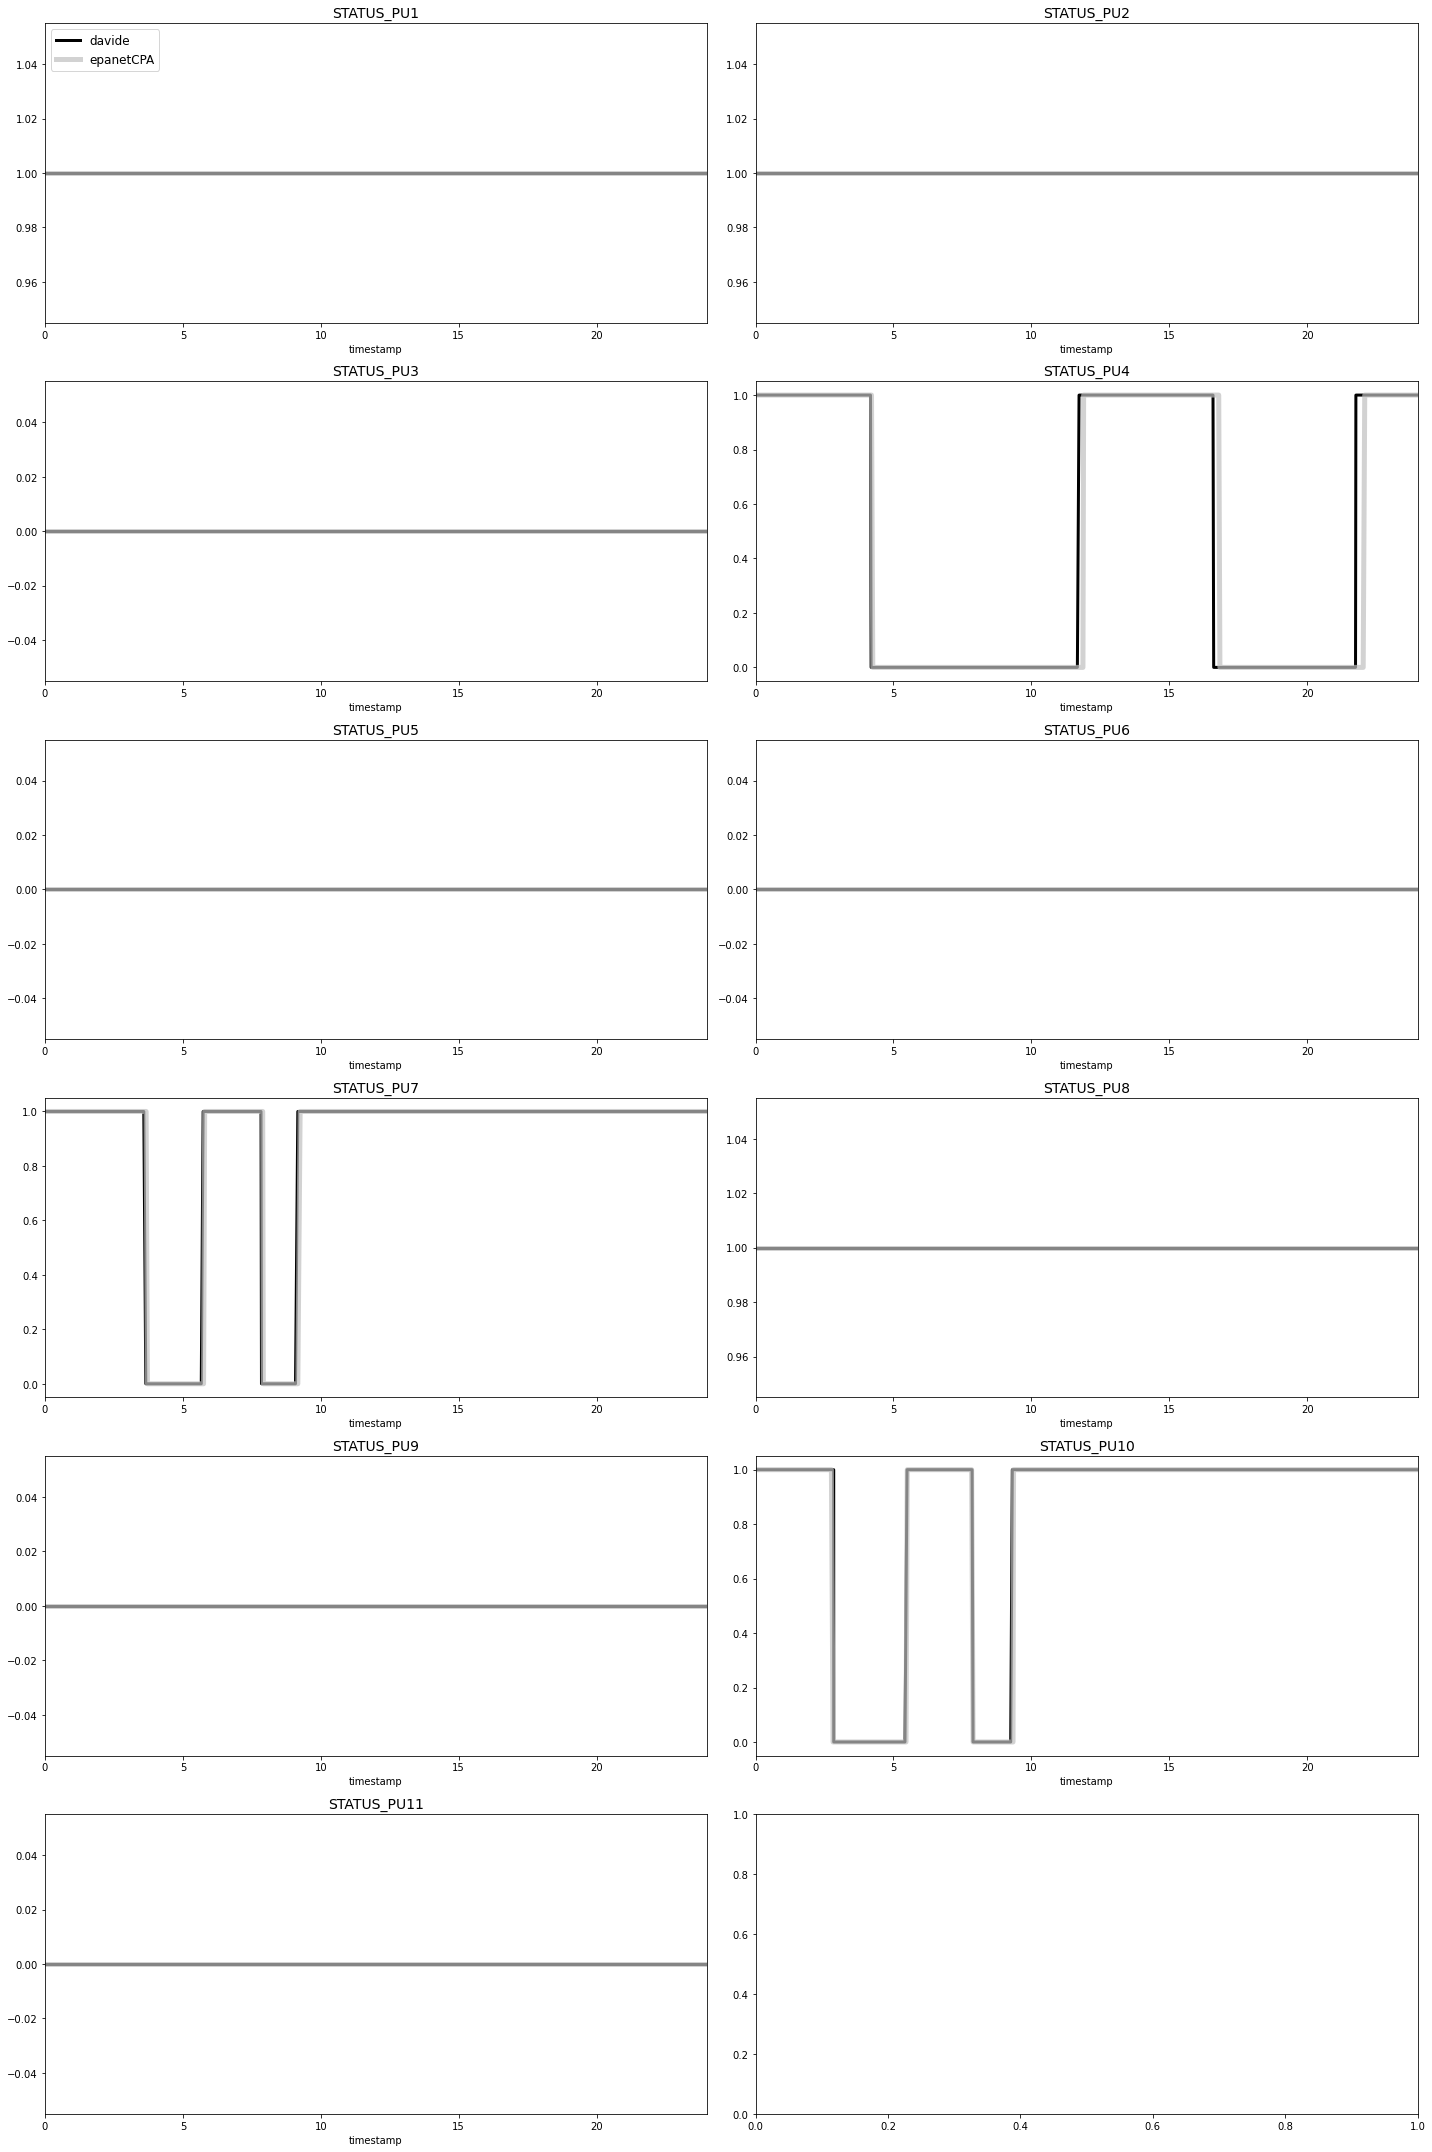

In [16]:
df_links = net.df_links_report
df_pumps = df_links.iloc[:, df_links.columns.get_level_values(2)=='status']['pumps']
df_pumps.index = np.round(df_pumps.index.total_seconds() / 3600, 4)

comparison_plots(df_pumps, df_ecpa, 'status')

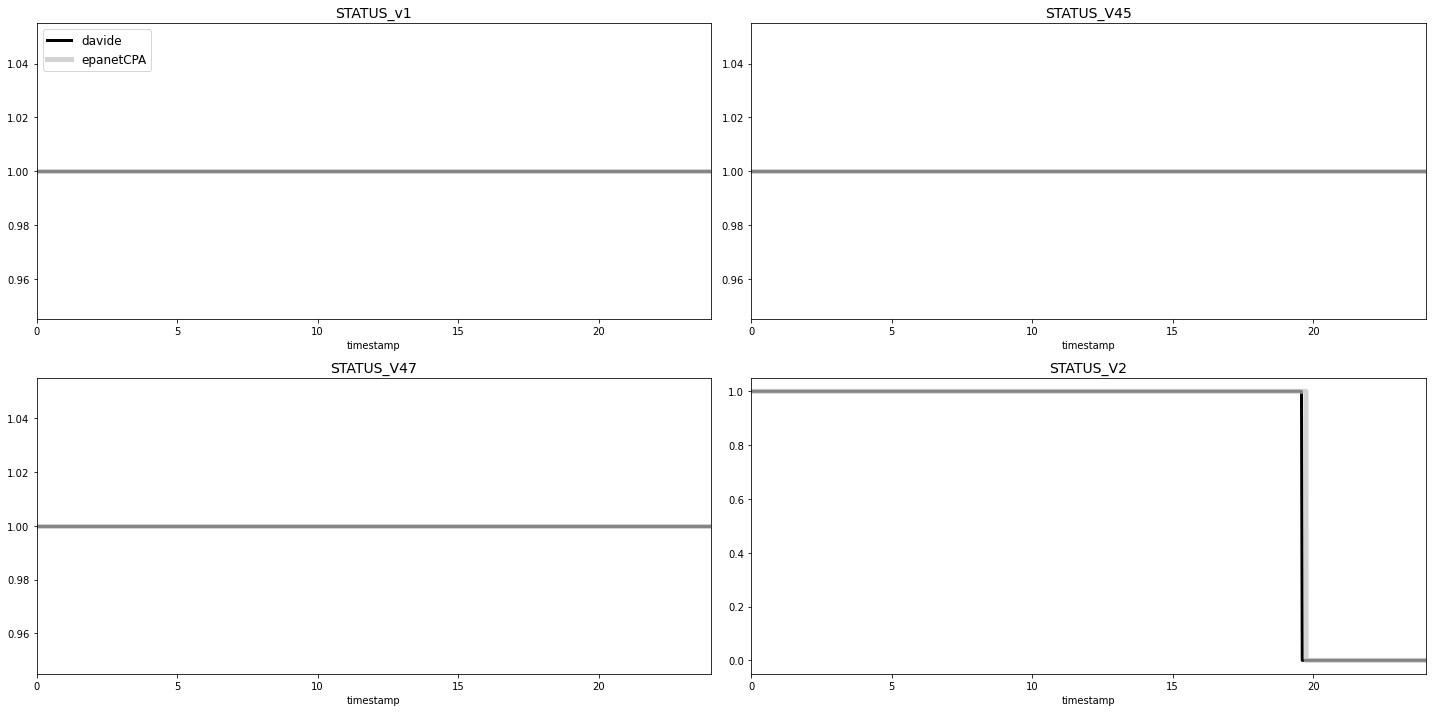

In [17]:
df_links = net.df_links_report
df_pumps = df_links.iloc[:, df_links.columns.get_level_values(2)=='status']['valves']
df_pumps.index = np.round(df_pumps.index.total_seconds() / 3600, 4)

comparison_plots(df_pumps, df_ecpa, 'status')